# Analysis of "Pokemon with Stat" Dataset

### Importing libraries

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data exploration

Before exploring the data we need to import the dataset "pokemon_data.csv"

In [366]:
pokemon=pd.read_csv("Pokemon_new.csv")

let's quickley explore the dataset, to get an idea of what we are going to deal with, using the head, tail and shape functions.

In [367]:
pokemon.head()

Unnamed: 0  pokedex_number           name german_name        japanese_name  \
0           0               1      Bulbasaur     Bisasam  フシギダネ (Fushigidane)   
1           1               2        Ivysaur   Bisaknosp   フシギソウ (Fushigisou)   
2           2               3       Venusaur    Bisaflor  フシギバナ (Fushigibana)   
3           3               3  Mega Venusaur    Bisaflor  フシギバナ (Fushigibana)   
4           4               4     Charmander    Glumanda      ヒトカゲ (Hitokage)   

   generation  status         species  type_number type_1  ... against_ground  \
0           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
1           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
2           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
3           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
4           1  Normal  Lizard Pokémon            1   Fire  ...            2.0   

   against_flying  against_psychic  against_bug against_rock against_ghost  \
0             2.0              2.0          1.0          1.0           1.0   
1             2.0              2.0          1.0          1.0           1.0   
2             2.0              2.0          1.0          1.0           1.0   
3             2.0              2.0          1.0          1.0           1.0   
4             1.0              1.0          0.5          2.0           1.0   

  against_dragon  against_dark  against_steel  against_fairy  
0            1.0           1.0            1.0            0.5  
1            1.0           1.0            1.0            0.5  
2            1.0           1.0            1.0            0.5  
3            1.0           1.0            1.0            0.5  
4            1.0           1.0            0.5            0.5  

[5 rows x 51 columns]

In [368]:
pokemon.tail()

Unnamed: 0  pokedex_number                            name german_name  \
1023        1023             888     Zacian Hero of Many Battles         NaN   
1024        1024             889        Zamazenta Crowned Shield         NaN   
1025        1025             889  Zamazenta Hero of Many Battles         NaN   
1026        1026             890                       Eternatus         NaN   
1027        1027             890             Eternatus Eternamax         NaN   

     japanese_name  generation     status           species  type_number  \
1023           NaN           8  Legendary   Warrior Pokémon            1   
1024           NaN           8  Legendary   Warrior Pokémon            2   
1025           NaN           8  Legendary   Warrior Pokémon            1   
1026           NaN           8  Legendary  Gigantic Pokémon            2   
1027           NaN           8  Legendary  Gigantic Pokémon            2   

        type_1  ... against_ground  against_flying  against_psychic  \
1023     Fairy  ...            1.0             1.0              1.0   
1024  Fighting  ...            2.0             1.0              1.0   
1025  Fighting  ...            1.0             2.0              2.0   
1026    Poison  ...            2.0             1.0              2.0   
1027    Poison  ...            2.0             1.0              2.0   

      against_bug against_rock against_ghost against_dragon  against_dark  \
1023         0.50         1.00           1.0            0.0           0.5   
1024         0.25         0.25           1.0            0.5           0.5   
1025         0.50         0.50           1.0            1.0           0.5   
1026         0.50         1.00           1.0            2.0           1.0   
1027         0.50         1.00           1.0            2.0           1.0   

      against_steel  against_fairy  
1023            2.0            1.0  
1024            0.5            1.0  
1025            1.0            2.0  
1026            1.0            1.0  
1027            1.0            1.0  

[5 rows x 51 columns]

In [369]:
pokemon.shape

(1028, 51)

Replace the column name to appropriate names(Replacing white space in the column name with dash) First we look into which columns are present in the dataset

In [370]:
pokemon.columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

As we can see in the given dataset there is little problem in Pokemon's Name columme. If they are the Mega_evoluation, the name contains redundancies. So now we correct them by replace function

In [371]:
pokemon['name']=pokemon['name'].str.replace(".*(?=Mega)","")

In [372]:
pokemon.head()

Unnamed: 0  pokedex_number           name german_name        japanese_name  \
0           0               1      Bulbasaur     Bisasam  フシギダネ (Fushigidane)   
1           1               2        Ivysaur   Bisaknosp   フシギソウ (Fushigisou)   
2           2               3       Venusaur    Bisaflor  フシギバナ (Fushigibana)   
3           3               3  Mega Venusaur    Bisaflor  フシギバナ (Fushigibana)   
4           4               4     Charmander    Glumanda      ヒトカゲ (Hitokage)   

   generation  status         species  type_number type_1  ... against_ground  \
0           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
1           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
2           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
3           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
4           1  Normal  Lizard Pokémon            1   Fire  ...            2.0   

   against_flying  against_psychic  against_bug against_rock against_ghost  \
0             2.0              2.0          1.0          1.0           1.0   
1             2.0              2.0          1.0          1.0           1.0   
2             2.0              2.0          1.0          1.0           1.0   
3             2.0              2.0          1.0          1.0           1.0   
4             1.0              1.0          0.5          2.0           1.0   

  against_dragon  against_dark  against_steel  against_fairy  
0            1.0           1.0            1.0            0.5  
1            1.0           1.0            1.0            0.5  
2            1.0           1.0            1.0            0.5  
3            1.0           1.0            1.0            0.5  
4            1.0           1.0            0.5            0.5  

[5 rows x 51 columns]

In [373]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


### Dropping unwanted columns

In the dataset there are lots of unwanted columns so we have to drop it using the drop ()

In [374]:
cols_to_drop=['Unnamed: 0','german_name','japanese_name','against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy']
pokemon=pokemon.drop(cols_to_drop,axis=1)

In [375]:
pokemon.head()

pokedex_number           name  generation  status         species  \
0               1      Bulbasaur           1  Normal    Seed Pokémon   
1               2        Ivysaur           1  Normal    Seed Pokémon   
2               3       Venusaur           1  Normal    Seed Pokémon   
3               3  Mega Venusaur           1  Normal    Seed Pokémon   
4               4     Charmander           1  Normal  Lizard Pokémon   

   type_number type_1  type_2  height_m  weight_kg  ...  speed catch_rate  \
0            2  Grass  Poison       0.7        6.9  ...   45.0       45.0   
1            2  Grass  Poison       1.0       13.0  ...   60.0       45.0   
2            2  Grass  Poison       2.0      100.0  ...   80.0       45.0   
3            2  Grass  Poison       2.4      155.5  ...   80.0       45.0   
4            1   Fire     NaN       0.6        8.5  ...   65.0       45.0   

  base_friendship base_experience  growth_rate  egg_type_number  egg_type_1  \
0            70.0            64.0  Medium Slow                2       Grass   
1            70.0           142.0  Medium Slow                2       Grass   
2            70.0           236.0  Medium Slow                2       Grass   
3            70.0           281.0  Medium Slow                2       Grass   
4            70.0            62.0  Medium Slow                2      Dragon   

   egg_type_2  percentage_male  egg_cycles  
0     Monster             87.5        20.0  
1     Monster             87.5        20.0  
2     Monster             87.5        20.0  
3     Monster             87.5        20.0  
4     Monster             87.5        20.0  

[5 rows x 30 columns]

new data about info()

In [376]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pokedex_number    1028 non-null   int64  
 1   name              1028 non-null   object 
 2   generation        1028 non-null   int64  
 3   status            1028 non-null   object 
 4   species           1028 non-null   object 
 5   type_number       1028 non-null   int64  
 6   type_1            1028 non-null   object 
 7   type_2            542 non-null    object 
 8   height_m          1028 non-null   float64
 9   weight_kg         1027 non-null   float64
 10  abilities_number  1028 non-null   int64  
 11  ability_1         1025 non-null   object 
 12  ability_2         513 non-null    object 
 13  ability_hidden    810 non-null    object 
 14  total_points      1028 non-null   float64
 15  hp                1028 non-null   float64
 16  attack            1028 non-null   float64


### Exploratory Data Analysis And Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001641B5CD310>,
      dtype=object)

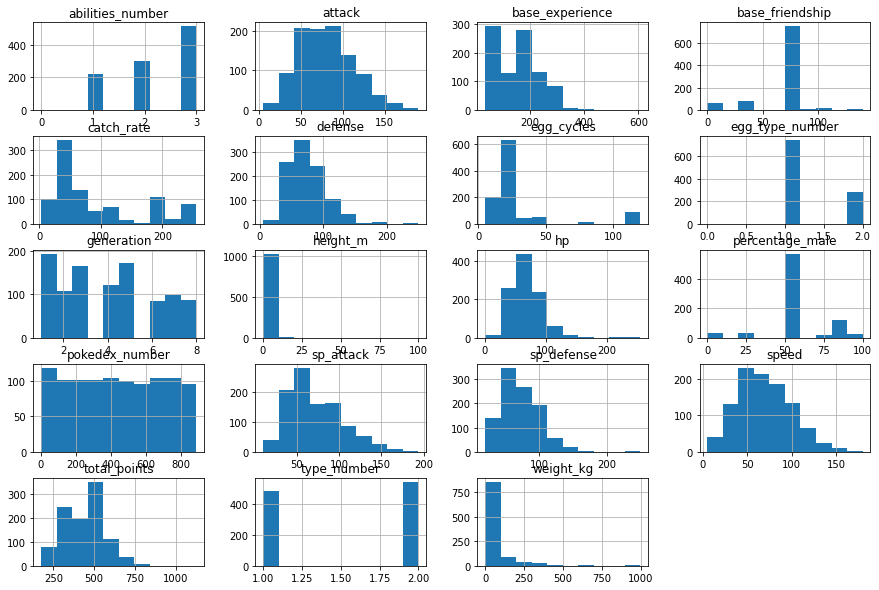

In [377]:
pokemon.hist(figsize=(15,10))

Firstly we want to know how many Pokemons our dataset contains

In [378]:
no_of_pokemons=pokemon.shape[0]
print('There are {} Pokemon in our dataset'.format(no_of_pokemons))

There are 1028 Pokemon in our dataset


To calculate the basic statistics we use describe function

In [379]:
pokemon.describe()

pokedex_number   generation  type_number     height_m    weight_kg  \
count     1028.000000  1028.000000  1028.000000  1028.000000  1027.000000   
mean       437.711089     4.034047     1.527237     1.368093    69.753749   
std        259.366480     2.234937     0.499501     3.380126   129.221230   
min          1.000000     1.000000     1.000000     0.100000     0.100000   
25%        213.750000     2.000000     1.000000     0.600000     8.800000   
50%        433.500000     4.000000     2.000000     1.000000    28.500000   
75%        663.250000     6.000000     2.000000     1.500000    69.100000   
max        890.000000     8.000000     2.000000   100.000000   999.900000   

       abilities_number  total_points           hp       attack      defense  \
count       1028.000000   1028.000000  1028.000000  1028.000000  1028.000000   
mean           2.284047    437.571984    69.577821    80.119650    74.475681   
std            0.794981    121.664910    26.385849    32.372321    31.303309   
min            0.000000    175.000000     1.000000     5.000000     5.000000   
25%            2.000000    330.000000    50.000000    55.000000    50.000000   
50%            2.000000    455.000000    66.500000    76.000000    70.000000   
75%            3.000000    510.000000    80.000000   100.000000    90.000000   
max            3.000000   1125.000000   255.000000   190.000000   250.000000   

         sp_attack   sp_defense        speed  catch_rate  base_friendship  \
count  1028.000000  1028.000000  1028.000000  924.000000       924.000000   
mean     72.732490    72.132296    68.534047   93.172078        64.139610   
std      32.677698    28.083684    29.802103   75.240630        21.455464   
min      10.000000    20.000000     5.000000    3.000000         0.000000   
25%      50.000000    50.000000    45.000000   45.000000        70.000000   
50%      65.000000    70.000000    65.000000   60.000000        70.000000   
75%      95.000000    90.000000    90.000000  127.000000        70.000000   
max     194.000000   250.000000   180.000000  255.000000       140.000000   

       base_experience  egg_type_number  percentage_male   egg_cycles  
count       924.000000      1028.000000       792.000000  1027.000000  
mean        153.814935         1.271401        55.003157    30.316456  
std          79.270628         0.451417        20.182675    28.942912  
min          36.000000         0.000000         0.000000     5.000000  
25%          67.000000         1.000000        50.000000    20.000000  
50%         159.000000         1.000000        50.000000    20.000000  
75%         201.500000         2.000000        50.000000    25.000000  
max         608.000000         2.000000       100.000000   120.000000

In addition we can plot all columns against each other to see distribution, relation between the columns using pairplot function from seaborn library

In [380]:
pokemon=pokemon.drop('pokedex_number',axis=1)


In [381]:
pokemon.head(3)

name  generation  status       species  type_number type_1  type_2  \
0  Bulbasaur           1  Normal  Seed Pokémon            2  Grass  Poison   
1    Ivysaur           1  Normal  Seed Pokémon            2  Grass  Poison   
2   Venusaur           1  Normal  Seed Pokémon            2  Grass  Poison   

   height_m  weight_kg  abilities_number  ... speed catch_rate  \
0       0.7        6.9                 2  ...  45.0       45.0   
1       1.0       13.0                 2  ...  60.0       45.0   
2       2.0      100.0                 2  ...  80.0       45.0   

  base_friendship  base_experience  growth_rate  egg_type_number  egg_type_1  \
0            70.0             64.0  Medium Slow                2       Grass   
1            70.0            142.0  Medium Slow                2       Grass   
2            70.0            236.0  Medium Slow                2       Grass   

   egg_type_2  percentage_male  egg_cycles  
0     Monster             87.5        20.0  
1     Monster             87.5        20.0  
2     Monster             87.5        20.0  

[3 rows x 29 columns]

#### Pairplot

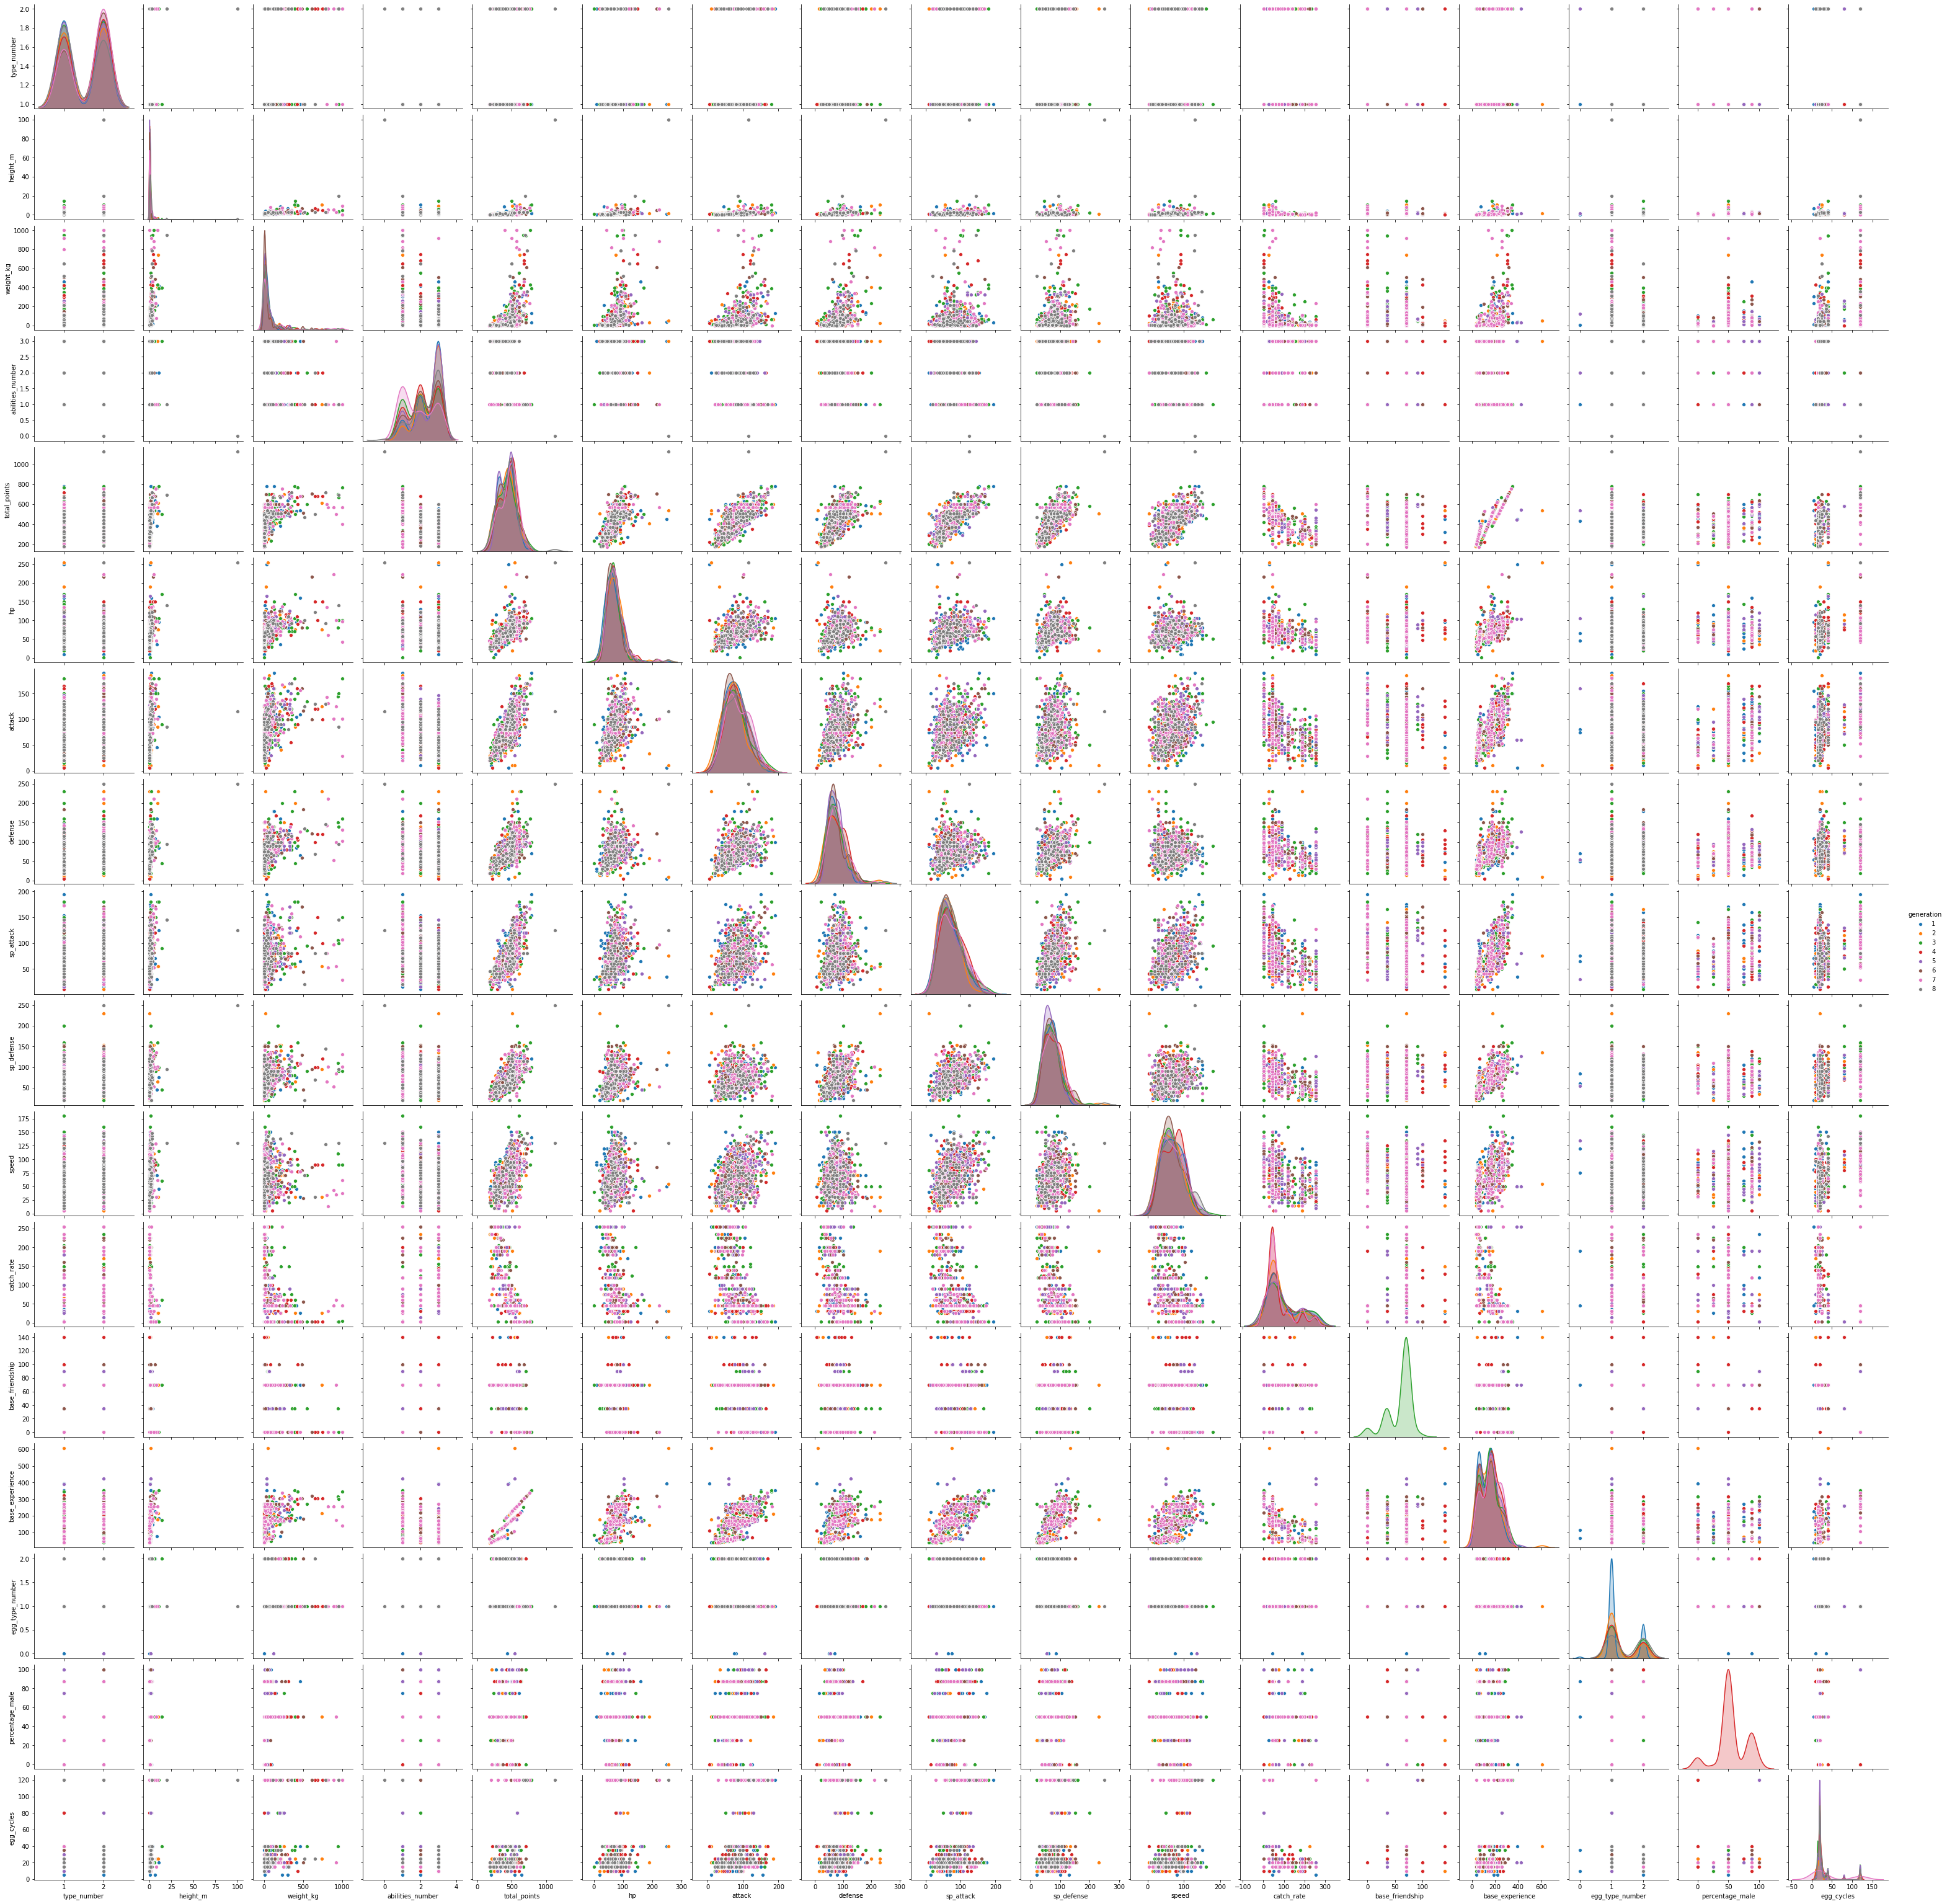

In [382]:
sns.pairplot(pokemon,hue="generation")

Lets see how many Pokemon generations are in our dataset

In [383]:
pokemon['generation'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

(array([192., 107., 165.,   0., 121., 171.,   0.,  85.,  99.,  88.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

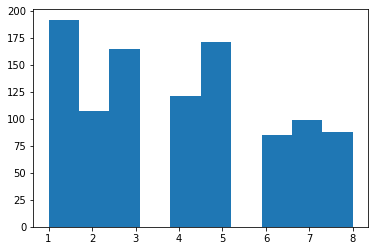

In [384]:
plt.hist(pokemon['generation'])

As we can see there are 8 generations present in the dataset i.e 1,2,3,4,5,6 generation 1,3,5 are more in numbers

As categorical data is not showen in describe() and Pair plot so, we can see which diffrent TYpe and combinations our Pokemon possess.

#### Type_1

In [385]:
pokemon['type_1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

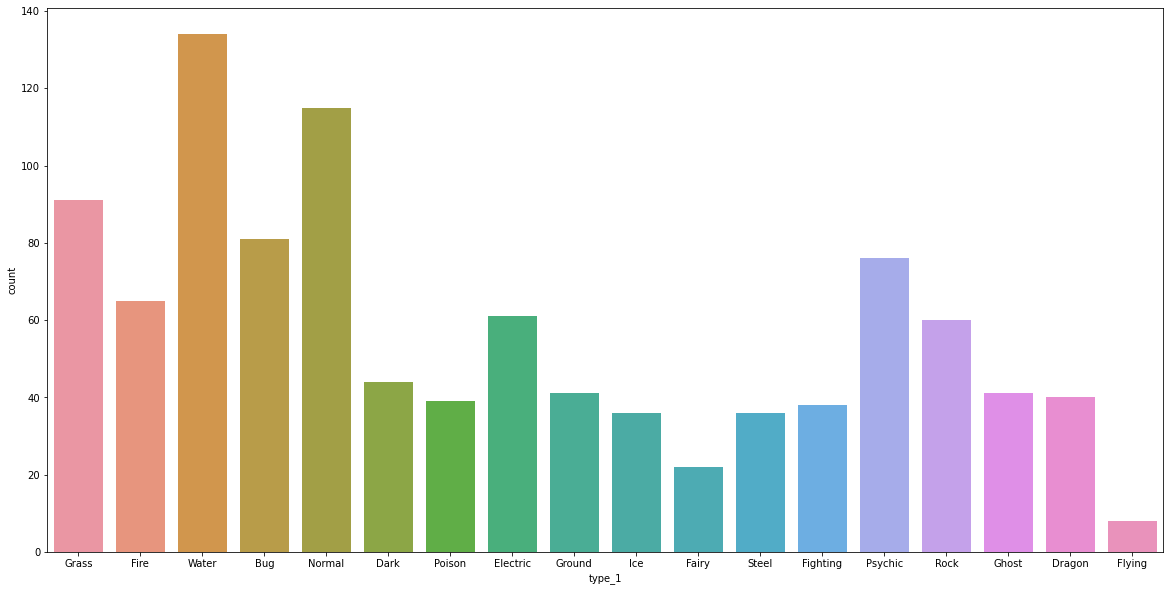

In [386]:
plt.figure(figsize=(20,10))
sns.countplot(x="type_1",data=pokemon)

In the dataset most of the pokemon is of water and normal type and from above we can see  there are very few of flying type. we can see it by generation also.

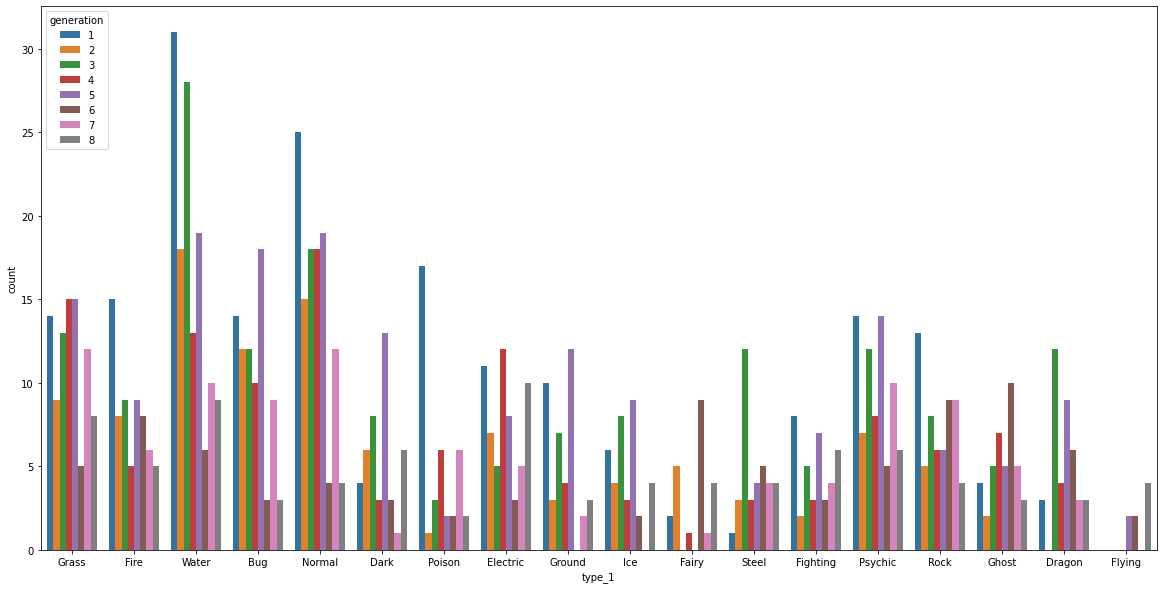

In [387]:
plt.figure(figsize=(20,10))
sns.countplot(x="type_1",data=pokemon,hue="generation")

From above plot we can see for some pokemon types we dont have all data regarding generations for example - 
* The Flying type of pokemon we dont have the data of 1st,2nd,3rd,4th and 7th generation.
* The Fairy type of pokemon does not contain information of 3rd and 5th generation of data.


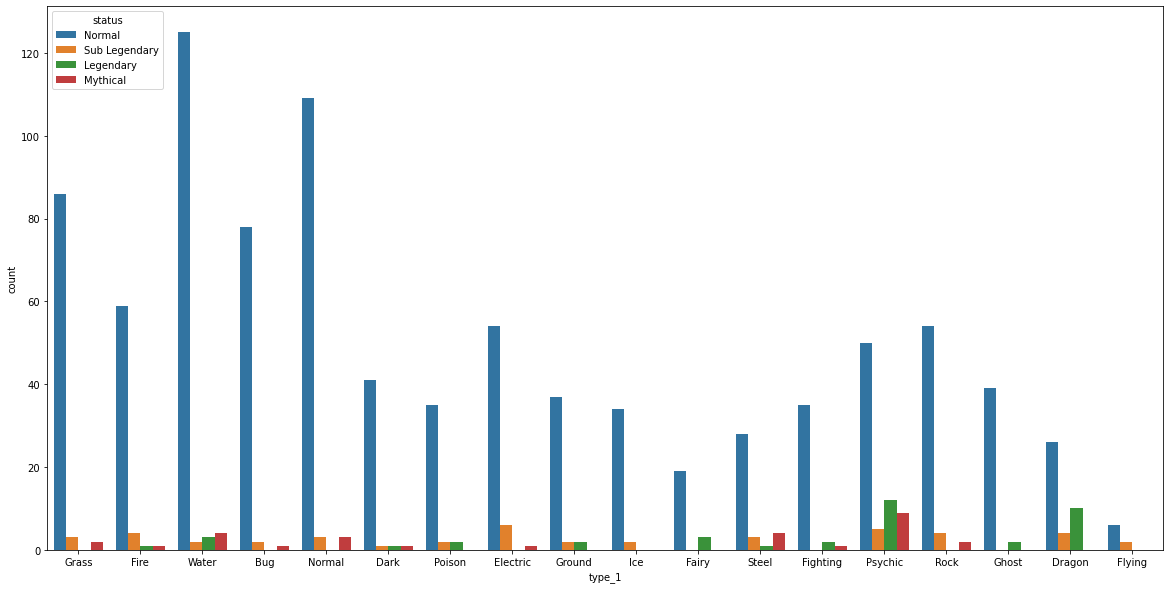

In [388]:
plt.figure(figsize=(20,10))
sns.countplot(x="type_1",data=pokemon,hue="status")

As we can see 
* all flying pokemons contains of normal and sub-legendar type in Type_1 Group of pokemons. 
* Apart from it "Psychic" and "Dragon" type of pokemon are more of legendry type. The categories like "Bug", "Poison" and "Fighting" are mostly normal type of pokemon.
* High number of Mythical pokemon are in the group of psychic type of pokemons.

#### Type_2

In [389]:
pokemon['type_2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Normal', 'Psychic', 'Steel',
       'Ground', 'Fairy', 'Grass', 'Fighting', 'Electric', 'Ice', 'Dark',
       'Ghost', 'Rock', 'Water', 'Fire', 'Bug'], dtype=object)

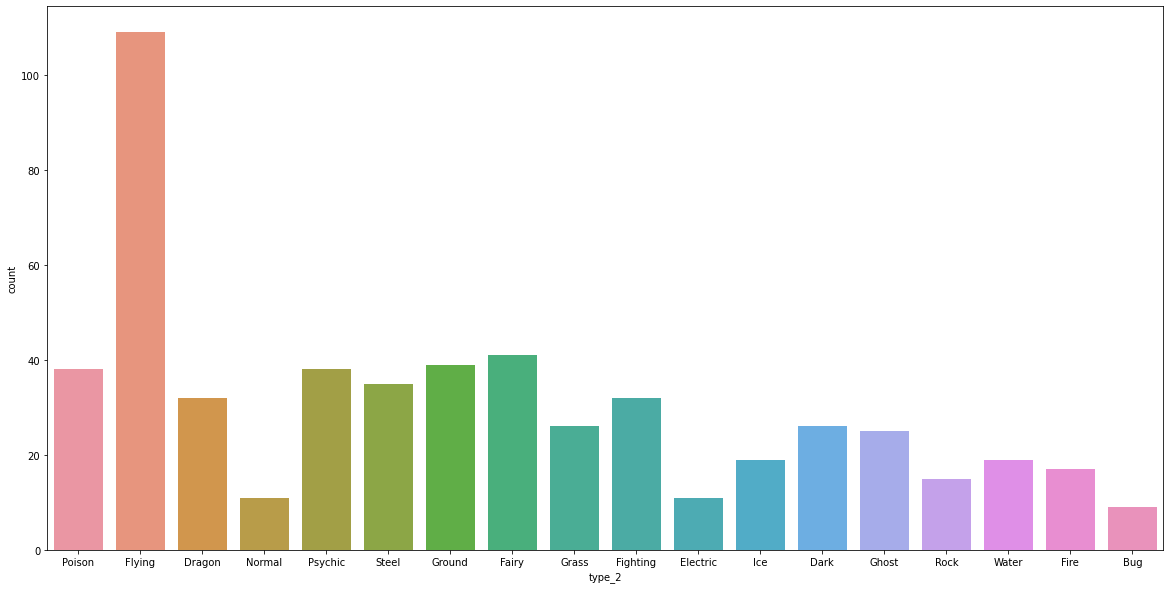

In [390]:
plt.figure(figsize=(20,10))
sns.countplot(x="type_2",data=pokemon)

Here, most of the pokemon in Type_2 category is of "Flaying" type, The "Bug" and "Normal" type of pokemons are less in numbers.

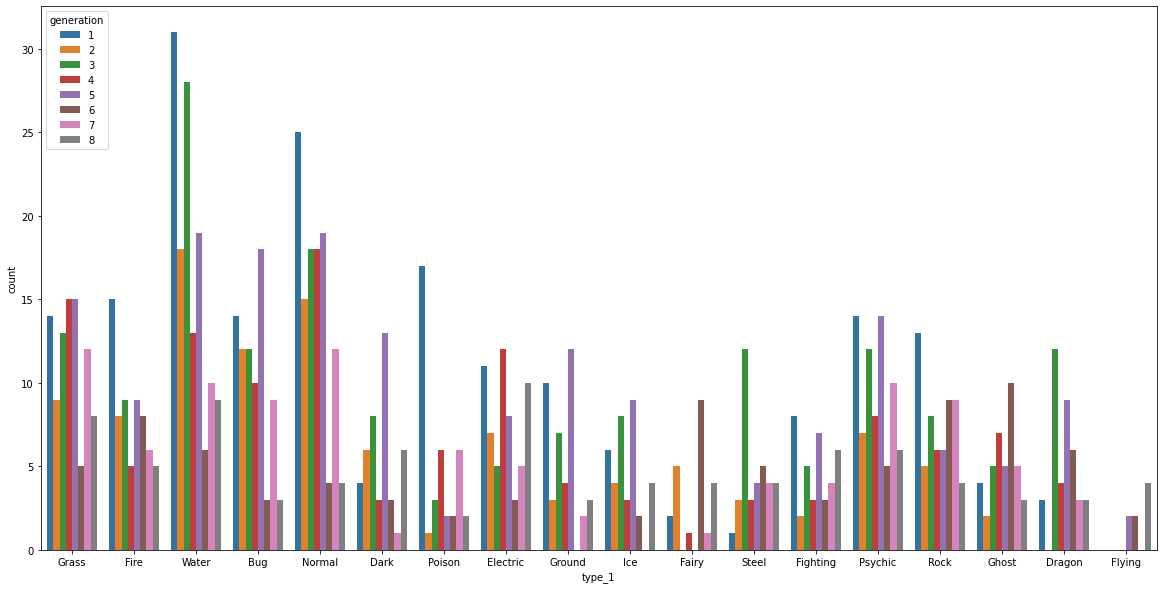

In [391]:
plt.figure(figsize=(20,10))
sns.countplot(x="type_1",data=pokemon,hue="generation")

For Type_2 category some of the generation data is not mentioned

#### Status-

In [392]:
pokemon['status'].unique()

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

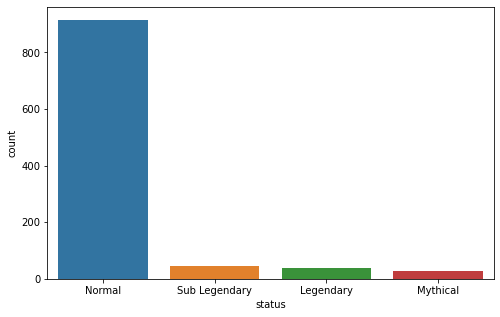

In [393]:
plt.figure(figsize=(8,5))
sns.countplot(x="status",data=pokemon)

* The normal type of pokemons are large in numbers.
* We can see that mythical type of pokemons are rare in numbers.

#### Species

In [394]:
pokemon['species'].unique()

array(['Seed Pokémon', 'Lizard Pokémon', 'Flame Pokémon',
       'Tiny Turtle Pokémon', 'Turtle Pokémon', 'Shellfish Pokémon',
       'Worm Pokémon', 'Cocoon Pokémon', 'Butterfly Pokémon',
       'Hairy Bug Pokémon', 'Poison Bee Pokémon', 'Tiny Bird Pokémon',
       'Bird Pokémon', 'Mouse Pokémon', 'Beak Pokémon', 'Snake Pokémon',
       'Cobra Pokémon', 'Poison Pin Pokémon', 'Drill Pokémon',
       'Fairy Pokémon', 'Fox Pokémon', 'Balloon Pokémon', 'Bat Pokémon',
       'Weed Pokémon', 'Flower Pokémon', 'Mushroom Pokémon',
       'Insect Pokémon', 'Poison Moth Pokémon', 'Mole Pokémon',
       'Scratch Cat Pokémon', 'Classy Cat Pokémon', 'Duck Pokémon',
       'Pig Monkey Pokémon', 'Puppy Pokémon', 'Legendary Pokémon',
       'Tadpole Pokémon', 'Psi Pokémon', 'Superpower Pokémon',
       'Flycatcher Pokémon', 'Jellyfish Pokémon', 'Rock Pokémon',
       'Megaton Pokémon', 'Fire Horse Pokémon', 'Unique Horn Pokémon',
       'Dopey Pokémon', 'Hermit Crab Pokémon', 'Magnet Pokémon',
      

#### Abilities -

In [395]:
pokemon['abilities_number'].unique()

array([2, 1, 3, 0], dtype=int64)

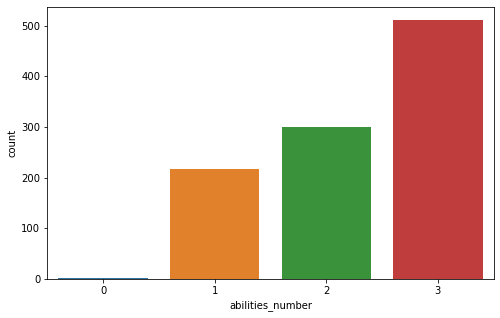

In [396]:
plt.figure(figsize=(8,5))
sns.countplot(x="abilities_number",data=pokemon)

Ther is high ratio of pokemons who has 3 abilities. Only few pokemon has  0 abilities

In [397]:
pokemon['ability_1'].value_counts()

Levitate          41
Swift Swim        30
Keen Eye          28
Pressure          25
Chlorophyll       25
                  ..
White Smoke        1
Emergency Exit     1
Primordial Sea     1
Scrappy            1
Marvel Scale       1
Name: ability_1, Length: 202, dtype: int64

In [398]:
pokemon['ability_2'].value_counts()

Frisk           17
Sturdy          14
Shell Armor     13
Early Bird      10
Infiltrator     10
                ..
Reckless         1
Pressure         1
Snow Warning     1
Stall            1
Telepathy        1
Name: ability_2, Length: 126, dtype: int64

In [399]:
pokemon['ability_hidden'].value_counts()

Telepathy         21
Sheer Force       18
Overcoat          17
Unnerve           17
Regenerator       15
                  ..
Compound Eyes      1
Electric Surge     1
White Smoke        1
Motor Drive        1
Toxic Boost        1
Name: ability_hidden, Length: 154, dtype: int64

Large number of pokemon has hidden ability of Telepathy.

#### Growth Rate

In [400]:
pokemon['growth_rate'].unique()

array(['Medium Slow', 'Medium Fast', 'Fast', 'Slow', 'Fluctuating',
       'Erratic', nan], dtype=object)

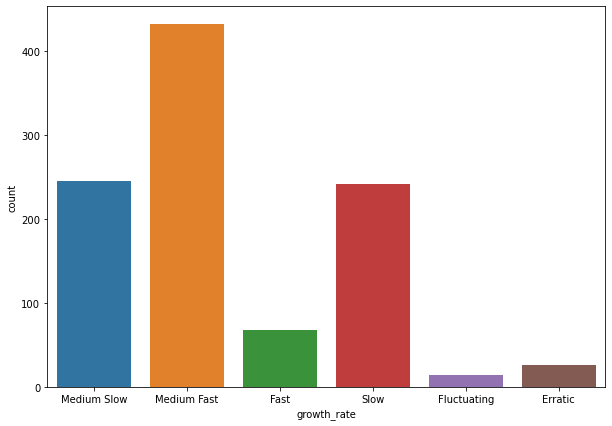

In [401]:
plt.figure(figsize=(10,7))
sns.countplot(x="growth_rate",data=pokemon)

In [402]:
pokemon['growth_rate'].value_counts(normalize=True)

Medium Fast    0.420643
Medium Slow    0.238559
Slow           0.235638
Fast           0.066212
Erratic        0.025316
Fluctuating    0.013632
Name: growth_rate, dtype: float64

* Approx 85% of pokemon falls in medium slow, medium fast and slow gowth rate.
* Erratic growth rate is of rare kind i.e only 1.3% falls in this category.

### eggs-

In [403]:
pokemon['egg_type_number'].unique()

array([2, 1, 0], dtype=int64)

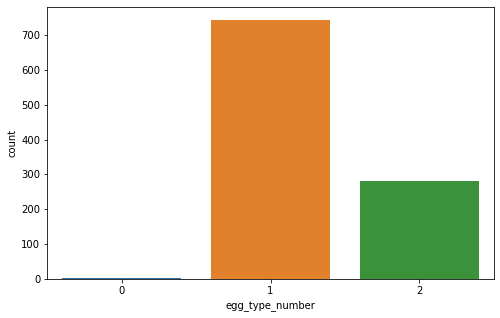

In [404]:
plt.figure(figsize=(8,5))
sns.countplot(x="egg_type_number",data=pokemon)

#### Percentage of male

In [405]:
pokemon['percentage_male'].value_counts()

50.0     564
87.5     121
25.0      31
0.0       31
100.0     25
75.0      20
Name: percentage_male, dtype: int64

### Data cleaning and Handling missing values

In [406]:
pokemon.isnull().sum()

name                  0
generation            0
status                0
species               0
type_number           0
type_1                0
type_2              486
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           515
ability_hidden      218
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate          104
base_friendship     104
base_experience     104
growth_rate           1
egg_type_number       0
egg_type_1            3
egg_type_2          746
percentage_male     236
egg_cycles            1
dtype: int64

In [407]:
null_data=pokemon[pokemon.isnull().any(axis=1)]
null_data

name  generation     status           species  \
0                          Bulbasaur           1     Normal      Seed Pokémon   
1                            Ivysaur           1     Normal      Seed Pokémon   
2                           Venusaur           1     Normal      Seed Pokémon   
3                      Mega Venusaur           1     Normal      Seed Pokémon   
4                         Charmander           1     Normal    Lizard Pokémon   
...                              ...         ...        ...               ...   
1023     Zacian Hero of Many Battles           8  Legendary   Warrior Pokémon   
1024        Zamazenta Crowned Shield           8  Legendary   Warrior Pokémon   
1025  Zamazenta Hero of Many Battles           8  Legendary   Warrior Pokémon   
1026                       Eternatus           8  Legendary  Gigantic Pokémon   
1027             Eternatus Eternamax           8  Legendary  Gigantic Pokémon   

      type_number    type_1  type_2  height_m  weight_kg  abilities_number  \
0               2     Grass  Poison       0.7        6.9                 2   
1               2     Grass  Poison       1.0       13.0                 2   
2               2     Grass  Poison       2.0      100.0                 2   
3               2     Grass  Poison       2.4      155.5                 1   
4               1      Fire     NaN       0.6        8.5                 2   
...           ...       ...     ...       ...        ...               ...   
1023            1     Fairy     NaN       2.8      110.0                 1   
1024            2  Fighting   Steel       2.9      785.0                 1   
1025            1  Fighting     NaN       2.9      210.0                 1   
1026            2    Poison  Dragon      20.0      950.0                 1   
1027            2    Poison  Dragon     100.0        NaN                 0   

      ...  speed catch_rate base_friendship  base_experience  growth_rate  \
0     ...   45.0       45.0            70.0             64.0  Medium Slow   
1     ...   60.0       45.0            70.0            142.0  Medium Slow   
2     ...   80.0       45.0            70.0            236.0  Medium Slow   
3     ...   80.0       45.0            70.0            281.0  Medium Slow   
4     ...   65.0       45.0            70.0             62.0  Medium Slow   
...   ...    ...        ...             ...              ...          ...   
1023  ...  138.0        NaN             NaN              NaN         Slow   
1024  ...  128.0        NaN             NaN              NaN         Slow   
1025  ...  138.0        NaN             NaN              NaN         Slow   
1026  ...  130.0        NaN             NaN              NaN         Slow   
1027  ...  130.0        NaN             NaN              NaN         Slow   

      egg_type_number    egg_type_1  egg_type_2  percentage_male  egg_cycles  
0                   2         Grass     Monster             87.5        20.0  
1                   2         Grass     Monster             87.5        20.0  
2                   2         Grass     Monster             87.5        20.0  
3                   2         Grass     Monster             87.5        20.0  
4                   2        Dragon     Monster             87.5        20.0  
...               ...           ...         ...              ...         ...  
1023                1  Undiscovered         NaN              NaN       120.0  
1024                1  Undiscovered         NaN              NaN       120.0  
1025                1  Undiscovered         NaN              NaN       120.0  
1026                1  Undiscovered         NaN              NaN       120.0  
1027                1  Undiscovered         NaN              NaN       120.0  

[945 rows x 29 columns]

We can replace missing values of categorical data with frequent observation i.e "mode". Here the mode value is flying.

In [408]:
mode=pokemon['type_2'].mode()
mode

0    Flying
dtype: object

In [409]:
pokemon['type_2'].fillna(mode[0],inplace=True)

In [410]:
mode1=pokemon['ability_1'].mode()
mode

0    Flying
dtype: object

In [411]:
pokemon['ability_1'].fillna(mode1[0],inplace=True)

In [412]:
mode2=pokemon['growth_rate'].mode()
mode2

0    Medium Fast
dtype: object

In [413]:
pokemon['growth_rate'].fillna(mode2[0],inplace=True)

In [414]:
catch_mean=pokemon['catch_rate'].mean()
catch_mean

93.17207792207792

In [415]:
pokemon['catch_rate'].fillna(catch_mean,inplace=True)

In [416]:
base_frd_mean=pokemon['base_friendship'].mean()
base_frd_mean

64.1396103896104

In [417]:
pokemon['base_friendship'].fillna(base_frd_mean,inplace=True)

In [418]:
base_exp_mean=pokemon['base_experience'].mean()
base_exp_mean

153.81493506493507

In [419]:
pokemon['base_experience'].fillna(base_frd_mean,inplace=True)

In [420]:
percentage_male_mean=pokemon['percentage_male'].mean()
percentage_male_mean

55.00315656565657

In [421]:
pokemon['percentage_male'].fillna(percentage_male_mean,inplace=True)

In [422]:
egg_cycle_mean=pokemon['egg_cycles'].mean()

In [423]:
pokemon['egg_cycles'].fillna(egg_cycle_mean,inplace=True)

In [424]:
egg_type_1_mode=pokemon['egg_type_1'].mode()
egg_type_1_mode

0    Field
dtype: object

In [425]:
pokemon['egg_type_1'].fillna(egg_type_1_mode[0],inplace=True)

In [426]:
weight_mean=pokemon['weight_kg'].mean()
weight_mean

69.75374878286273

In [427]:
pokemon['weight_kg'].fillna(weight_mean,inplace=True)

In [428]:
ability_hidden_mode=pokemon['ability_hidden'].mode()
ability_hidden_mode

0    Telepathy
dtype: object

In [429]:
pokemon['ability_hidden'].fillna(ability_hidden_mode[0],inplace=True)

Now checking for missing values again after imputation

In [430]:
pokemon.isnull().sum()

name                  0
generation            0
status                0
species               0
type_number           0
type_1                0
type_2                0
height_m              0
weight_kg             0
abilities_number      0
ability_1             0
ability_2           515
ability_hidden        0
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate            0
base_friendship       0
base_experience       0
growth_rate           0
egg_type_number       0
egg_type_1            0
egg_type_2          746
percentage_male       0
egg_cycles            0
dtype: int64

we can see column 
* ability_2 = 515
* egg_type_2 = 746 

null values contains  more than 50% of null values. Imputing mean or mode will change the results. so we are dropping the above two columns.

In [431]:
columns=['egg_type_2','ability_2']
pokemon.drop(columns,axis=1,inplace=True)
pokemon

name  generation     status           species  \
0                          Bulbasaur           1     Normal      Seed Pokémon   
1                            Ivysaur           1     Normal      Seed Pokémon   
2                           Venusaur           1     Normal      Seed Pokémon   
3                      Mega Venusaur           1     Normal      Seed Pokémon   
4                         Charmander           1     Normal    Lizard Pokémon   
...                              ...         ...        ...               ...   
1023     Zacian Hero of Many Battles           8  Legendary   Warrior Pokémon   
1024        Zamazenta Crowned Shield           8  Legendary   Warrior Pokémon   
1025  Zamazenta Hero of Many Battles           8  Legendary   Warrior Pokémon   
1026                       Eternatus           8  Legendary  Gigantic Pokémon   
1027             Eternatus Eternamax           8  Legendary  Gigantic Pokémon   

      type_number    type_1  type_2  height_m   weight_kg  abilities_number  \
0               2     Grass  Poison       0.7    6.900000                 2   
1               2     Grass  Poison       1.0   13.000000                 2   
2               2     Grass  Poison       2.0  100.000000                 2   
3               2     Grass  Poison       2.4  155.500000                 1   
4               1      Fire  Flying       0.6    8.500000                 2   
...           ...       ...     ...       ...         ...               ...   
1023            1     Fairy  Flying       2.8  110.000000                 1   
1024            2  Fighting   Steel       2.9  785.000000                 1   
1025            1  Fighting  Flying       2.9  210.000000                 1   
1026            2    Poison  Dragon      20.0  950.000000                 1   
1027            2    Poison  Dragon     100.0   69.753749                 0   

      ... sp_defense  speed  catch_rate  base_friendship  base_experience  \
0     ...       65.0   45.0   45.000000         70.00000         64.00000   
1     ...       80.0   60.0   45.000000         70.00000        142.00000   
2     ...      100.0   80.0   45.000000         70.00000        236.00000   
3     ...      120.0   80.0   45.000000         70.00000        281.00000   
4     ...       50.0   65.0   45.000000         70.00000         62.00000   
...   ...        ...    ...         ...              ...              ...   
1023  ...      115.0  138.0   93.172078         64.13961         64.13961   
1024  ...      145.0  128.0   93.172078         64.13961         64.13961   
1025  ...      115.0  138.0   93.172078         64.13961         64.13961   
1026  ...       95.0  130.0   93.172078         64.13961         64.13961   
1027  ...      250.0  130.0   93.172078         64.13961         64.13961   

      growth_rate  egg_type_number    egg_type_1  percentage_male  egg_cycles  
0     Medium Slow                2         Grass        87.500000        20.0  
1     Medium Slow                2         Grass        87.500000        20.0  
2     Medium Slow                2         Grass        87.500000        20.0  
3     Medium Slow                2         Grass        87.500000        20.0  
4     Medium Slow                2        Dragon        87.500000        20.0  
...           ...              ...           ...              ...         ...  
1023         Slow                1  Undiscovered        55.003157       120.0  
1024         Slow                1  Undiscovered        55.003157       120.0  
1025         Slow                1  Undiscovered        55.003157       120.0  
1026         Slow                1  Undiscovered        55.003157       120.0  
1027         Slow                1  Undiscovered        55.003157       120.0  

[1028 rows x 27 columns]

In [432]:
pokemon.isnull().sum()

name                0
generation          0
status              0
species             0
type_number         0
type_1              0
type_2              0
height_m            0
weight_kg           0
abilities_number    0
ability_1           0
ability_hidden      0
total_points        0
hp                  0
attack              0
defense             0
sp_attack           0
sp_defense          0
speed               0
catch_rate          0
base_friendship     0
base_experience     0
growth_rate         0
egg_type_number     0
egg_type_1          0
percentage_male     0
egg_cycles          0
dtype: int64

#### Total -

(array([ 78., 248., 195., 351., 111.,  38.,   6.,   0.,   0.,   1.]),
 array([ 175.,  270.,  365.,  460.,  555.,  650.,  745.,  840.,  935.,
        1030., 1125.]),
 <a list of 10 Patch objects>)

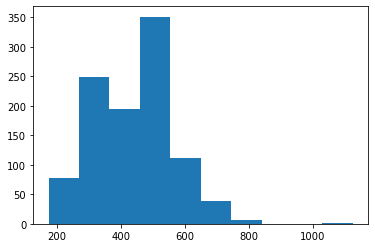

In [433]:
plt.hist(pokemon.total_points)

From above histogram we can see that the the "Total" column is not normally distributed. For testing significance diffrences. rank were generated using the rank function

In [434]:
pokemon['rank']=pokemon['total_points'].rank(method='first',ascending=False)
pokemon.head()

name  generation  status         species  type_number type_1  \
0      Bulbasaur           1  Normal    Seed Pokémon            2  Grass   
1        Ivysaur           1  Normal    Seed Pokémon            2  Grass   
2       Venusaur           1  Normal    Seed Pokémon            2  Grass   
3  Mega Venusaur           1  Normal    Seed Pokémon            2  Grass   
4     Charmander           1  Normal  Lizard Pokémon            1   Fire   

   type_2  height_m  weight_kg  abilities_number  ... speed catch_rate  \
0  Poison       0.7        6.9                 2  ...  45.0       45.0   
1  Poison       1.0       13.0                 2  ...  60.0       45.0   
2  Poison       2.0      100.0                 2  ...  80.0       45.0   
3  Poison       2.4      155.5                 1  ...  80.0       45.0   
4  Flying       0.6        8.5                 2  ...  65.0       45.0   

   base_friendship  base_experience  growth_rate  egg_type_number  egg_type_1  \
0             70.0             64.0  Medium Slow                2       Grass   
1             70.0            142.0  Medium Slow                2       Grass   
2             70.0            236.0  Medium Slow                2       Grass   
3             70.0            281.0  Medium Slow                2       Grass   
4             70.0             62.0  Medium Slow                2      Dragon   

   percentage_male  egg_cycles   rank  
0             87.5        20.0  805.0  
1             87.5        20.0  628.0  
2             87.5        20.0  210.0  
3             87.5        20.0   55.0  
4             87.5        20.0  835.0  

[5 rows x 28 columns]

### Analysis

#### Question :

Which are the strongest Types of Pokemon by Type_1, Type_2.

In [435]:
pokemon.groupby('type_1').mean().sort_values('total_points',ascending=False).head(10)


generation  type_number  height_m   weight_kg  abilities_number  \
type_1                                                                      
Dragon      4.525000     1.700000  2.247500  125.287500          1.950000   
Psychic     4.131579     1.421053  1.350000   69.939474          2.118421   
Steel       4.583333     1.694444  2.022222  231.113889          2.000000   
Fire        3.892308     1.476923  1.204615   65.020000          2.092308   
Electric    4.278689     1.459016  0.965574   36.070492          2.049180   
Rock        4.166667     1.733333  1.346667  114.481667          2.166667   
Ghost       4.756098     1.658537  1.212195   64.360976          2.097561   
Flying      6.750000     1.500000  1.112500   41.225000          2.375000   
Fairy       4.954545     1.136364  0.927273   40.445455          2.272727   
Fighting    4.421053     1.263158  1.300000   79.292105          2.526316   

          total_points         hp      attack     defense  sp_attack  \
type_1                                                                 
Dragon      535.275000  82.375000  107.200000   84.775000  91.525000   
Psychic     485.315789  71.973684   74.934211   70.986842  99.105263   
Steel       481.472222  69.527778   94.083333  117.388889  70.138889   
Fire        455.015385  69.430769   85.400000   68.107692  86.415385   
Electric    449.327869  61.950820   74.573770   66.508197  89.377049   
Rock        448.683333  67.100000   91.783333   97.966667  61.366667   
Ghost       440.756098  63.951220   74.195122   80.439024  81.975610   
Flying      440.000000  69.625000   75.125000   64.375000  73.875000   
Fairy       439.272727  72.954545   68.090909   70.545455  78.954545   
Fighting    439.052632  71.394737  101.263158   72.210526  56.421053   

          sp_defense      speed  catch_rate  base_friendship  base_experience  \
type_1                                                                          
Dragon     84.950000  84.450000   36.087906        42.685471       209.735471   
Psychic    87.723684  80.592105   78.559851        56.937585       176.398112   
Steel      76.694444  53.638889   62.477904        54.138258       166.693813   
Fire       71.292308  74.369231   72.705544        67.241508       156.133816   
Electric   72.016393  84.901639   94.257718        67.236002       148.793379   
Rock       72.800000  57.666667   75.078139        63.775974       143.559307   
Ghost      78.780488  61.414634   87.407032        59.184352       138.818499   
Flying     70.000000  87.000000   76.711039        72.069805       126.819805   
Fairy      89.181818  59.545455  112.622196        75.298111       129.525384   
Fighting   68.552632  69.210526   97.242225        67.078349       125.525718   

          egg_type_number  percentage_male  egg_cycles        rank  
type_1                                                              
Dragon           1.400000        51.626026   66.750000  319.625000  
Psychic          1.078947        53.455401   52.236842  412.842105  
Steel            1.138889        53.057485   44.861111  403.555556  
Fire             1.200000        66.346639   26.461538  458.769231  
Electric         1.229508        55.206263   28.196721  470.000000  
Rock             1.150000        63.750789   29.500000  483.050000  
Ghost            1.195122        50.244441   26.707317  504.707317  
Flying           1.375000        65.001578   43.125000  489.000000  
Fairy            1.272727        44.318899   31.590909  522.954545  
Fighting         1.315789        67.171717   29.736842  518.394737

In [436]:
pokemon.groupby('type_2').mean().sort_values('total_points',ascending=False).head(10)


generation  type_number  height_m   weight_kg  abilities_number  \
type_2                                                                      
Dragon      5.468750          2.0  6.290625  223.536055          1.843750   
Fighting    4.500000          2.0  1.443750   78.678125          1.937500   
Ice         4.421053          2.0  1.931579  144.789474          2.210526   
Steel       4.342857          2.0  1.400000  145.805714          2.142857   
Fire        4.882353          2.0  1.458824  122.941176          2.117647   
Dark        4.076923          2.0  1.669231   94.626923          2.192308   
Psychic     3.368421          2.0  1.202632   98.860526          2.026316   
Ghost       5.600000          2.0  1.456000   64.740000          1.800000   
Ground      3.307692          2.0  1.997436  137.641026          2.358974   
Rock        3.466667          2.0  1.086667  105.946667          3.000000   

          total_points         hp      attack     defense   sp_attack  \
type_2                                                                  
Dragon      544.531250  92.812500   93.875000   93.281250  102.812500   
Fighting    521.000000  80.125000  112.343750   83.312500   80.250000   
Ice         517.263158  87.736842   97.052632   84.526316   91.000000   
Steel       498.742857  68.628571  101.114286  105.857143   71.057143   
Fire        490.294118  74.470588   81.352941   78.058824   98.647059   
Dark        482.884615  76.115385  108.884615   70.730769   81.307692   
Psychic     477.605263  72.394737   73.552632   85.842105   86.578947   
Ghost       463.240000  64.920000   90.120000   82.120000   79.600000   
Ground      449.897436  79.820513   89.102564   90.846154   67.076923   
Rock        442.000000  70.866667   86.733333  125.066667   51.600000   

          sp_defense      speed  catch_rate  base_friendship  base_experience  \
type_2                                                                          
Dragon     84.406250  77.343750   59.230519        49.941153       177.566153   
Fighting   78.656250  86.312500   50.968750        58.750000       210.406250   
Ice        84.947368  72.000000   57.983595        54.029392       155.713602   
Steel      84.142857  67.942857   80.048237        58.187384       163.444527   
Fire       77.470588  80.294118   64.442131        56.318755       159.965814   
Dark       70.153846  75.692308   86.897852        62.626124       173.049201   
Psychic    88.842105  70.394737   70.693267        69.691558       169.454716   
Ghost      80.040000  66.440000   72.594416        56.027922       159.147922   
Ground     67.589744  55.461538   88.358974        62.820513       165.128205   
Rock       69.200000  38.533333   88.211472        62.609307       141.409307   

          egg_type_number  percentage_male  egg_cycles        rank  
type_2                                                              
Dragon           1.531250        57.032730   51.875000  290.937500  
Fighting         1.218750        63.907138   42.343750  295.031250  
Ice              1.263158        56.053961   40.000000  309.263158  
Steel            1.200000        55.643939   40.142857  367.628571  
Fire             1.058824        51.324829   40.018615  384.470588  
Dark             1.346154        55.384980   23.846154  404.653846  
Psychic          1.184211        50.330193   37.763158  415.105263  
Ghost            1.240000        52.301768   43.200000  460.080000  
Ground           1.307692        52.948961   30.128205  488.102564  
Rock             1.666667        56.166877   25.666667  488.800000

Here we can say from Type_1 and Type_2 ,"Dragon" type of Pokemon is the strongest one. . but most of the  "dragon+" other category is strongest

#### Question :

seeing the mean total socre of diffrent types of pokemon, the question raised if there are types that are  disproportionality  stronger than others. Therefore we are calculiting the diffrence of each Type_1s rank mean and median.

In [437]:
mean_rank_type1=pokemon.groupby(by='type_1').mean()['rank']

In [438]:
mean_rank_type1.sort_values(ascending=False)

type_1
Bug         633.765432
Normal      599.808696
Grass       554.978022
Poison      553.538462
Dark        535.659091
Ground      531.390244
Ice         530.000000
Water       523.097015
Fairy       522.954545
Fighting    518.394737
Ghost       504.707317
Flying      489.000000
Rock        483.050000
Electric    470.000000
Fire        458.769231
Psychic     412.842105
Steel       403.555556
Dragon      319.625000
Name: rank, dtype: float64

In [439]:
median_rank_type1=pokemon.groupby(by='type_1').median()['rank']

In [440]:
median_rank_type1.sort_values(ascending=False)

type_1
Bug         662.0
Normal      593.0
Grass       575.0
Ground      564.0
Dark        554.0
Water       515.0
Fairy       512.5
Poison      511.0
Fighting    500.0
Ice         495.5
Ghost       445.0
Fire        441.0
Rock        430.0
Electric    417.0
Flying      400.0
Psychic     391.0
Steel       317.0
Dragon      104.0
Name: rank, dtype: float64

In [441]:
shifted_diffrence=mean_rank_type1 -median_rank_type1

In [442]:
shifted_diffrence.sort_values(ascending=False)

type_1
Dragon      215.625000
Flying       89.000000
Steel        86.555556
Ghost        59.707317
Rock         53.050000
Electric     53.000000
Poison       42.538462
Ice          34.500000
Psychic      21.842105
Fighting     18.394737
Fire         17.769231
Fairy        10.454545
Water         8.097015
Normal        6.808696
Dark        -18.340909
Grass       -20.021978
Bug         -28.234568
Ground      -32.609756
Name: rank, dtype: float64

Text(0.5, 1.0, 'Diffrence of mean and madian rank grouped by Type_1')

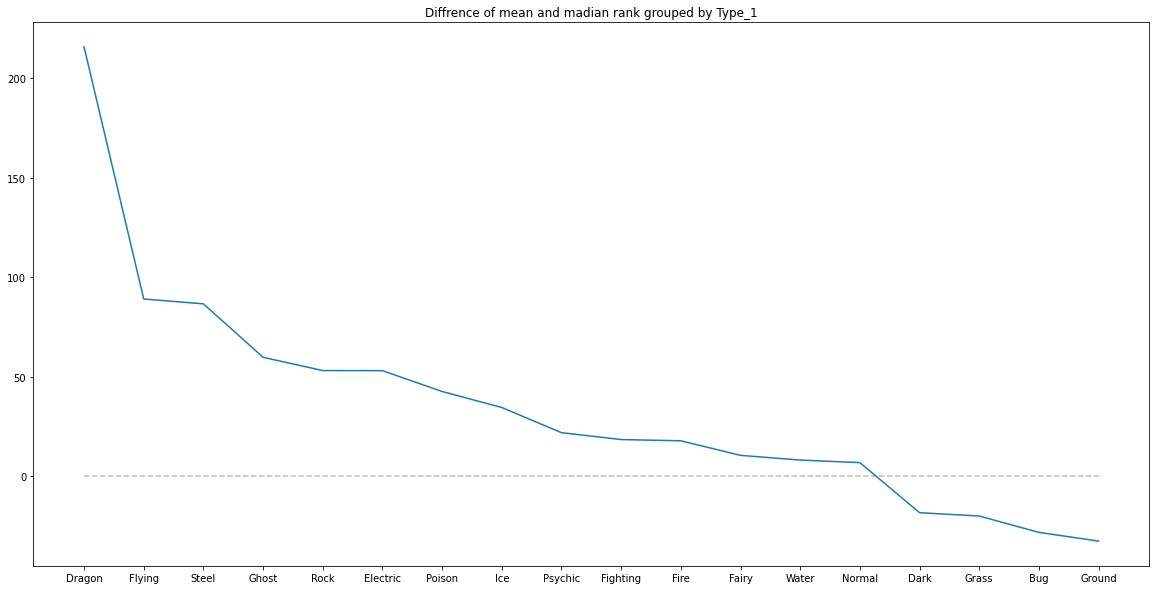

In [443]:
plt.figure(figsize=(20,10))
plt.plot(shifted_diffrence.sort_values(ascending=False))
plt.hlines(y=0,xmin=0,xmax=17,linestyle='dashed',alpha=0.25)
plt.title('Diffrence of mean and madian rank grouped by Type_1')

This plot states that chosing Primary pokemon(Type_1) as a  Flying or Dragon pokemon chances are considerably larger to get a stronger Pokemon than picking ground Pokemon.

In [444]:
mean_rank_type2=pokemon.groupby(by='type_2').mean()['rank']

In [445]:
mean_rank_type2.sort_values(ascending=False)

type_2
Bug         651.666667
Normal      601.000000
Poison      591.815789
Grass       563.384615
Flying      562.100840
Water       554.789474
Electric    533.636364
Fairy       493.585366
Rock        488.800000
Ground      488.102564
Ghost       460.080000
Psychic     415.105263
Dark        404.653846
Fire        384.470588
Steel       367.628571
Ice         309.263158
Fighting    295.031250
Dragon      290.937500
Name: rank, dtype: float64

In [446]:
median_rank_type2=pokemon.groupby(by='type_2').median()['rank']

In [447]:
median_rank_type2.sort_values(ascending=False)

type_2
Bug         716.0
Poison      657.0
Water       620.0
Grass       604.0
Normal      586.0
Flying      584.0
Ground      499.0
Electric    495.0
Fairy       445.0
Ghost       425.0
Dark        408.0
Rock        405.0
Psychic     370.0
Steel       343.0
Fire        268.0
Ice         261.0
Fighting    195.5
Dragon      185.5
Name: rank, dtype: float64

In [448]:
diffrence=mean_rank_type2 - median_rank_type2

In [449]:
diffrence.sort_values(ascending=False)

type_2
Fire        116.470588
Dragon      105.437500
Fighting     99.531250
Rock         83.800000
Fairy        48.585366
Ice          48.263158
Psychic      45.105263
Electric     38.636364
Ghost        35.080000
Steel        24.628571
Normal       15.000000
Dark         -3.346154
Ground      -10.897436
Flying      -21.899160
Grass       -40.615385
Bug         -64.333333
Poison      -65.184211
Water       -65.210526
Name: rank, dtype: float64

Text(0.5, 1.0, 'Diffrence of mean and madian rank grouped by Type_2')

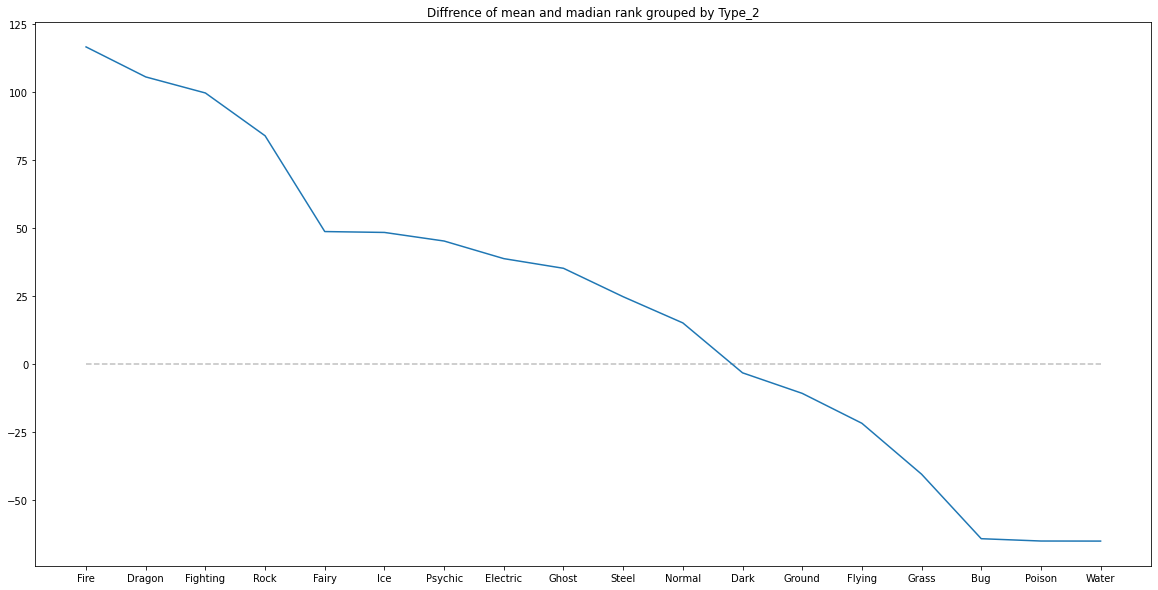

In [450]:
plt.figure(figsize=(20,10))
plt.plot(diffrence.sort_values(ascending=False))
plt.hlines(y=0,xmin=0,xmax=17,linestyle='dashed',alpha=0.25)
plt.title('Diffrence of mean and madian rank grouped by Type_2')

This plot states that chosing secondary pokemon(Type_2) as a Fire or Dragon pokemon chances are considerably larger to get a stronger Pokemon than picking water Pokemon.

#### Question :

Finding out top 10 winning pokemon combination type.

In [451]:
wining=pokemon.sort_values('total_points',ascending=False)
wining

name  generation     status            species  \
1027   Eternatus Eternamax           8  Legendary   Gigantic Pokémon   
190          Mega Mewtwo Y           1  Legendary    Genetic Pokémon   
189          Mega Mewtwo X           1  Legendary    Genetic Pokémon   
458          Mega Rayquaza           3  Legendary   Sky High Pokémon   
456         Primal Groudon           3  Legendary  Continent Pokémon   
...                    ...         ...        ...                ...   
351                Azurill           3     Normal  Polka Dot Pokémon   
1003                  Snom           8     Normal       Worm Pokémon   
232                Sunkern           2     Normal       Seed Pokémon   
954                Blipbug           8     Normal      Larva Pokémon   
871   Wishiwashi Solo Form           7     Normal  Small Fry Pokémon   

      type_number   type_1    type_2  height_m   weight_kg  abilities_number  \
1027            2   Poison    Dragon     100.0   69.753749                 0   
190             1  Psychic    Flying       1.5   33.000000                 1   
189             2  Psychic  Fighting       2.3  127.000000                 1   
458             2   Dragon    Flying      10.8  392.000000                 1   
456             2   Ground      Fire       5.0  999.700000                 1   
...           ...      ...       ...       ...         ...               ...   
351             2   Normal     Fairy       0.2    2.000000                 3   
1003            2      Ice       Bug       0.3    3.800000                 2   
232             1    Grass    Flying       0.3    1.800000                 3   
954             1      Bug    Flying       0.4    8.000000                 3   
871             1    Water    Flying       0.2    0.300000                 1   

      ...  speed  catch_rate  base_friendship  base_experience  growth_rate  \
1027  ...  130.0   93.172078         64.13961         64.13961         Slow   
190   ...  140.0    3.000000          0.00000        351.00000         Slow   
189   ...  130.0    3.000000          0.00000        351.00000         Slow   
458   ...  115.0    3.000000          0.00000        351.00000         Slow   
456   ...   90.0    5.000000          0.00000        347.00000         Slow   
...   ...    ...         ...              ...              ...          ...   
351   ...   20.0  150.000000         70.00000         38.00000         Fast   
1003  ...   20.0   93.172078         64.13961         64.13961  Medium Fast   
232   ...   30.0  235.000000         70.00000         36.00000  Medium Slow   
954   ...   45.0   93.172078         64.13961         64.13961  Medium Fast   
871   ...   40.0   60.000000         70.00000         61.00000         Fast   

      egg_type_number    egg_type_1  percentage_male  egg_cycles    rank  
1027                1  Undiscovered        55.003157       120.0     1.0  
190                 1  Undiscovered        55.003157       120.0     3.0  
189                 1  Undiscovered        55.003157       120.0     2.0  
458                 1  Undiscovered        55.003157       120.0     4.0  
456                 1  Undiscovered        55.003157       120.0     6.0  
...               ...           ...              ...         ...     ...  
351                 1  Undiscovered        25.000000        10.0  1024.0  
1003                1           Bug        55.003157        20.0  1025.0  
232                 1         Grass        50.000000        20.0  1026.0  
954                 1           Bug        55.003157        15.0  1027.0  
871                 1       Water 2        50.000000        15.0  1028.0  

[1028 rows x 28 columns]

Text(671.9, 10.2, 'Average Total of top 10 pokemon types')

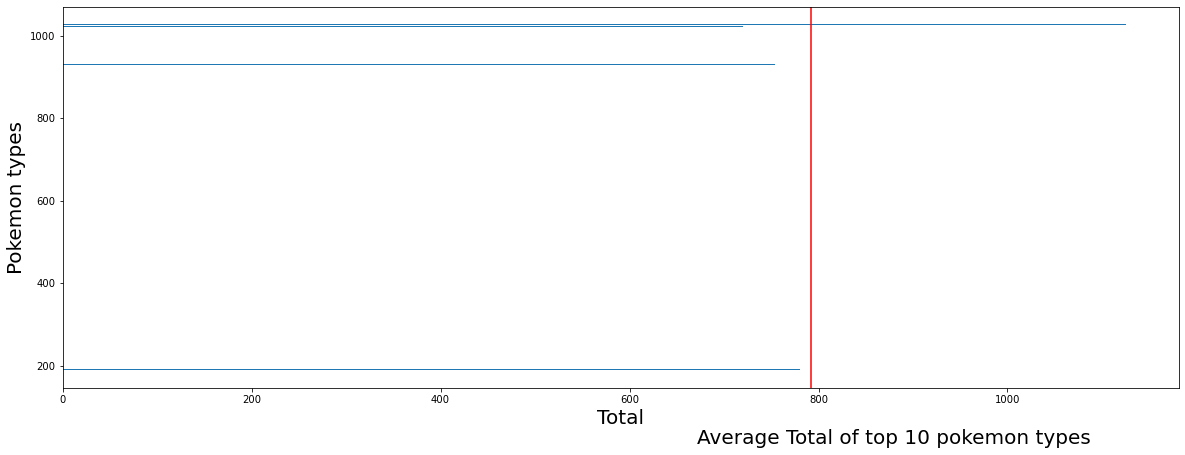

In [452]:
win_10=wining[:10]

fig,ax=plt.subplots(figsize=(20,7))
plt.barh(win_10.index,win_10.get('total_points'))

plt.xlabel('Total',size=20)
plt.ylabel('Pokemon types',size=20)

#average line
plt.axvline(x=win_10.get('total_points').mean(),color='red')

ax.text(win_10.get('total_points').mean()-120,10.2,'Average Total of top 10 pokemon types', size=20)

#### Question :

Pokemon with highest winning possibilities

In [453]:
(wining[wining.get('total_points')>=700])

name  generation         status            species  \
1027       Eternatus Eternamax           8      Legendary   Gigantic Pokémon   
190              Mega Mewtwo Y           1      Legendary    Genetic Pokémon   
189              Mega Mewtwo X           1      Legendary    Genetic Pokémon   
458              Mega Rayquaza           3      Legendary   Sky High Pokémon   
456             Primal Groudon           3      Legendary  Continent Pokémon   
454              Primal Kyogre           3      Legendary  Sea Basin Pokémon   
930             Ultra Necrozma           7      Legendary      Prism Pokémon   
1024  Zamazenta Crowned Shield           8      Legendary    Warrior Pokémon   
584                     Arceus           4       Mythical      Alpha Pokémon   
1022      Zacian Crowned Sword           8      Legendary    Warrior Pokémon   
835     Zygarde Complete Forme           6      Legendary      Order Pokémon   
450                Mega Latias           3  Sub Legendary        Eon Pokémon   
837               Mega Diancie           6       Mythical      Jewel Pokémon   
295             Mega Tyranitar           2         Normal      Armor Pokémon   
526              Mega Garchomp           4         Normal       Mach Pokémon   
441             Mega Salamence           3         Normal     Dragon Pokémon   
445             Mega Metagross           3         Normal   Iron Leg Pokémon   
749               Black Kyurem           5      Legendary   Boundary Pokémon   
750               White Kyurem           5      Legendary   Boundary Pokémon   
452                Mega Latios           3  Sub Legendary        Eon Pokémon   

      type_number    type_1    type_2  height_m   weight_kg  abilities_number  \
1027            2    Poison    Dragon     100.0   69.753749                 0   
190             1   Psychic    Flying       1.5   33.000000                 1   
189             2   Psychic  Fighting       2.3  127.000000                 1   
458             2    Dragon    Flying      10.8  392.000000                 1   
456             2    Ground      Fire       5.0  999.700000                 1   
454             1     Water    Flying       9.8  430.000000                 1   
930             2   Psychic    Dragon       7.5  230.000000                 1   
1024            2  Fighting     Steel       2.9  785.000000                 1   
584             1    Normal    Flying       3.2  320.000000                 1   
1022            2     Fairy     Steel       2.8  355.000000                 1   
835             2    Dragon    Ground       4.5  610.000000                 1   
450             2    Dragon   Psychic       1.8   52.000000                 1   
837             2      Rock     Fairy       1.1   27.800000                 1   
295             2      Rock      Dark       2.5  255.000000                 1   
526             2    Dragon    Ground       1.9   95.000000                 1   
441             2    Dragon    Flying       1.8  112.600000                 1   
445             2     Steel   Psychic       2.5  942.900000                 1   
749             2    Dragon       Ice       3.3  325.000000                 1   
750             2    Dragon       Ice       3.6  325.000000                 1   
452             2    Dragon   Psychic       2.3   70.000000                 1   

      ...  speed catch_rate  base_friendship  base_experience  growth_rate  \
1027  ...  130.0  93.172078         64.13961         64.13961         Slow   
190   ...  140.0   3.000000          0.00000        351.00000         Slow   
189   ...  130.0   3.000000          0.00000        351.00000         Slow   
458   ...  115.0   3.000000          0.00000        351.00000         Slow   
456   ...   90.0   5.000000          0.00000        347.00000         Slow   
454   ...   90.0   5.000000          0.00000        347.00000         Slow   
930   ...  129.0   3.000000          0.00000        339.00000         Slow   
1024  ...  128.0  9

#### Question :

which are the strongest Pokemon in the game concerning their Total_score. as we know here the Total does not folows normal distribution so we are using Rank column for this analysis.

In [454]:
pokemon.sort_values(by='rank',ascending=True).head()

name  generation     status            species  \
1027  Eternatus Eternamax           8  Legendary   Gigantic Pokémon   
189         Mega Mewtwo X           1  Legendary    Genetic Pokémon   
190         Mega Mewtwo Y           1  Legendary    Genetic Pokémon   
458         Mega Rayquaza           3  Legendary   Sky High Pokémon   
454         Primal Kyogre           3  Legendary  Sea Basin Pokémon   

      type_number   type_1    type_2  height_m   weight_kg  abilities_number  \
1027            2   Poison    Dragon     100.0   69.753749                 0   
189             2  Psychic  Fighting       2.3  127.000000                 1   
190             1  Psychic    Flying       1.5   33.000000                 1   
458             2   Dragon    Flying      10.8  392.000000                 1   
454             1    Water    Flying       9.8  430.000000                 1   

      ...  speed catch_rate  base_friendship  base_experience  growth_rate  \
1027  ...  130.0  93.172078         64.13961         64.13961         Slow   
189   ...  130.0   3.000000          0.00000        351.00000         Slow   
190   ...  140.0   3.000000          0.00000        351.00000         Slow   
458   ...  115.0   3.000000          0.00000        351.00000         Slow   
454   ...   90.0   5.000000          0.00000        347.00000         Slow   

      egg_type_number    egg_type_1  percentage_male  egg_cycles  rank  
1027                1  Undiscovered        55.003157       120.0   1.0  
189                 1  Undiscovered        55.003157       120.0   2.0  
190                 1  Undiscovered        55.003157       120.0   3.0  
458                 1  Undiscovered        55.003157       120.0   4.0  
454                 1  Undiscovered        55.003157       120.0   5.0  

[5 rows x 28 columns]

Here we are plotting Rank against its Total scores, while using their Type_1 as color code

In [455]:
Rank_plot=pokemon.sort_values(by='rank',ascending=True)[0:100]

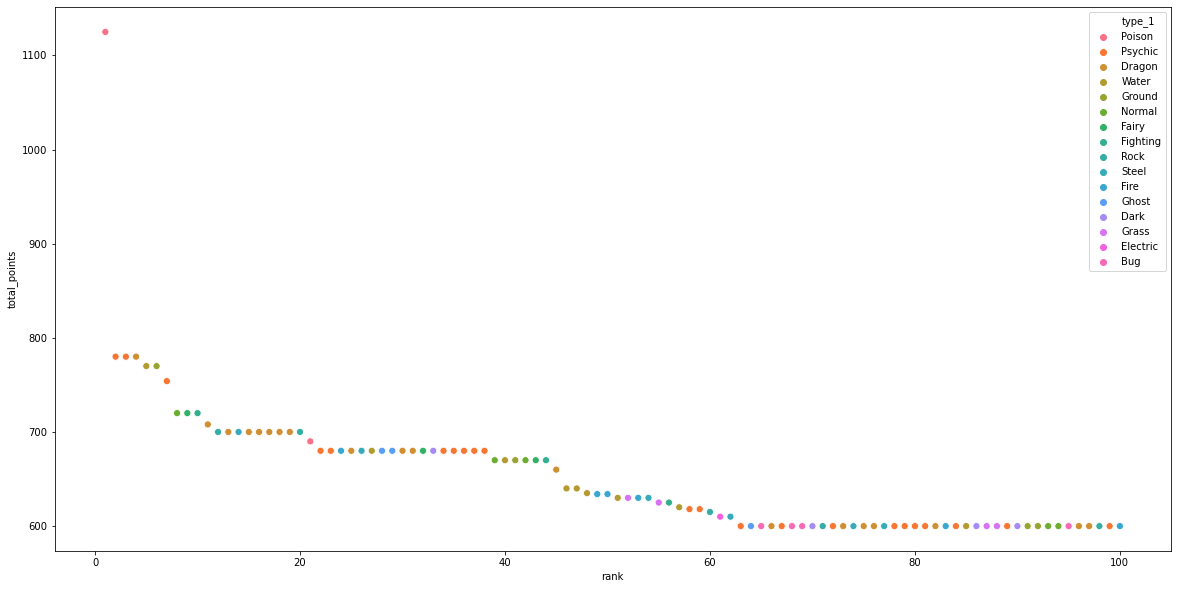

In [456]:
plt.figure(figsize=(20,10))
sns.scatterplot('rank','total_points',hue='type_1',s=50,alpha=1,data=Rank_plot)

#### Question :

Which are the strongest and weakest Pokemon?

In [457]:
pokemon.sort_values(by='rank', ascending=True)[:1]

name  generation     status           species  \
1027  Eternatus Eternamax           8  Legendary  Gigantic Pokémon   

      type_number  type_1  type_2  height_m  weight_kg  abilities_number  ...  \
1027            2  Poison  Dragon     100.0  69.753749                 0  ...   

      speed catch_rate  base_friendship  base_experience  growth_rate  \
1027  130.0  93.172078         64.13961         64.13961         Slow   

      egg_type_number    egg_type_1  percentage_male  egg_cycles  rank  
1027                1  Undiscovered        55.003157       120.0   1.0  

[1 rows x 28 columns]

The strongest overall Pokemon is Mega Mewtwo

In [458]:
pokemon.sort_values(by='rank',ascending=False)[:1]

name  generation  status            species  type_number  \
871  Wishiwashi Solo Form           7  Normal  Small Fry Pokémon            1   

    type_1  type_2  height_m  weight_kg  abilities_number  ... speed  \
871  Water  Flying       0.2        0.3                 1  ...  40.0   

    catch_rate  base_friendship  base_experience  growth_rate  \
871       60.0             70.0             61.0         Fast   

     egg_type_number  egg_type_1  percentage_male  egg_cycles    rank  
871                1     Water 2             50.0        15.0  1028.0  

[1 rows x 28 columns]

Weakest Pokemon over all 8 generations is Sunkern

#### Question : 

Which is the strongest and weakest generation of Pokemon.

In [459]:
pokemon.groupby(by='generation').mean()['rank'].sort_values(ascending=False)

generation
2    553.607477
1    543.520833
3    530.042424
8    526.750000
5    519.982456
6    499.576471
7    461.767677
4    449.644628
Name: rank, dtype: float64

Generation 2 seems to be the strongest Pokemon and generation 4 is weakest Pokemon. here apart from generation 4 others are too close to each other.

#### Question :

Number of  Pokemon in each generation

In [460]:
generations=pd.DataFrame({'count':pokemon.generation.value_counts().sort_index()})
generations

count
1    192
2    107
3    165
4    121
5    171
6     85
7     99
8     88

Plotting Bar chart

Text(0, 0.5, 'Number of Pokemon')

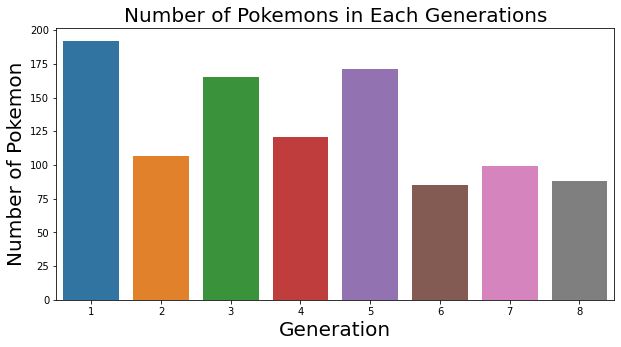

In [461]:
plt.figure(figsize=(10,5))
sns.barplot(x=generations.index,y=generations['count'])
plt.title("Number of Pokemons in Each Generations",fontdict={'fontsize':20})
plt.xlabel("Generation",fontdict={'fontsize':20})
plt.ylabel('Number of Pokemon',fontdict={'fontsize':20})

There is high number of Pokemons from 1st, 3rd, 5th Generations as compairs to other generation. Generation 6 contains less Pokemons

#### Question :


what are the features impacting the Total_points

In [462]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1028 non-null   object 
 1   generation        1028 non-null   int64  
 2   status            1028 non-null   object 
 3   species           1028 non-null   object 
 4   type_number       1028 non-null   int64  
 5   type_1            1028 non-null   object 
 6   type_2            1028 non-null   object 
 7   height_m          1028 non-null   float64
 8   weight_kg         1028 non-null   float64
 9   abilities_number  1028 non-null   int64  
 10  ability_1         1028 non-null   object 
 11  ability_hidden    1028 non-null   object 
 12  total_points      1028 non-null   float64
 13  hp                1028 non-null   float64
 14  attack            1028 non-null   float64
 15  defense           1028 non-null   float64
 16  sp_attack         1028 non-null   float64


In [463]:
corr = pokemon.corr()
corr['total_points'].sort_values(ascending=False)


total_points        1.000000
base_experience     0.820824
sp_attack           0.733534
attack              0.733509
sp_defense          0.721923
hp                  0.650141
defense             0.631085
speed               0.562561
egg_cycles          0.536239
weight_kg           0.471010
height_m            0.375629
type_number         0.208692
percentage_male     0.095550
generation          0.068375
egg_type_number    -0.087220
base_friendship    -0.303541
abilities_number   -0.421573
catch_rate         -0.682168
rank               -0.975508
Name: total_points, dtype: float64

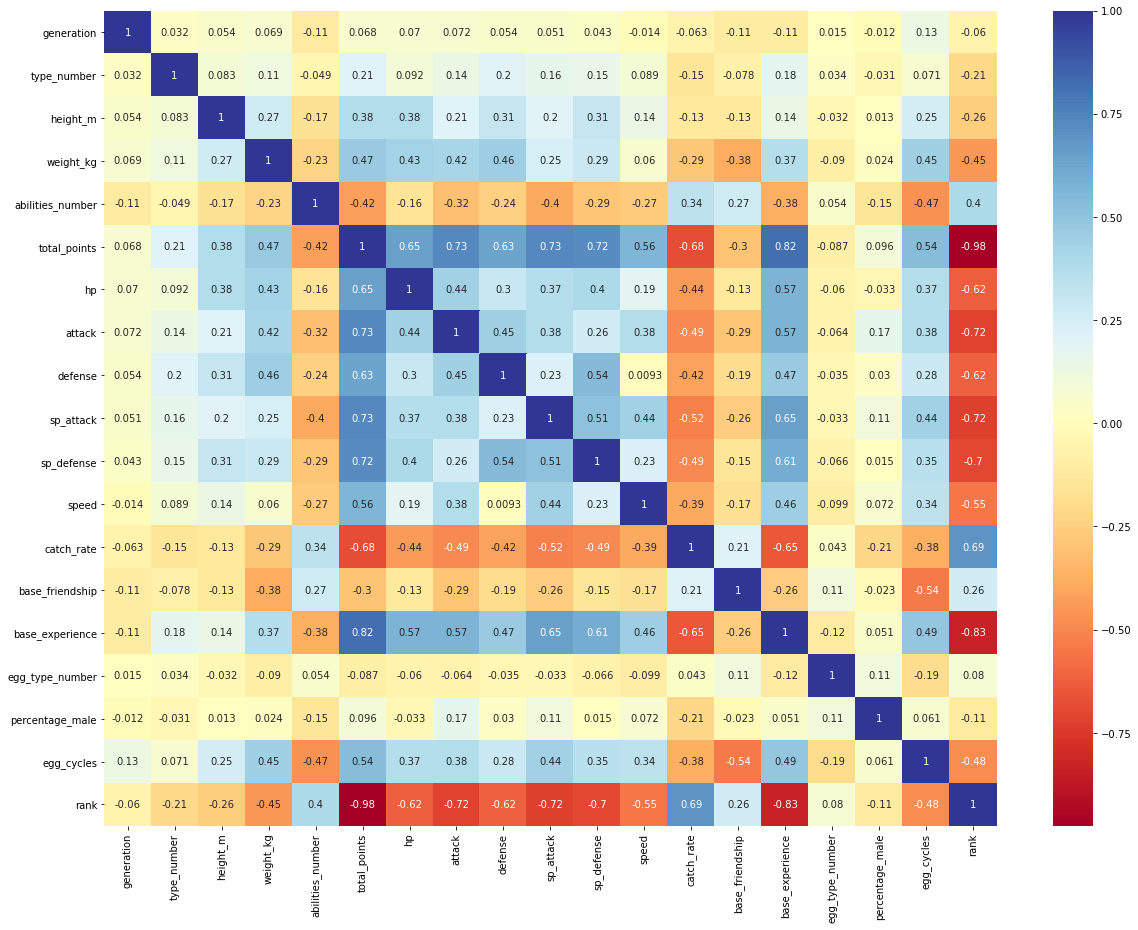

In [464]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='RdYlBu')

from above heat map we can see that the features which are positively correlated to total_points are " Attack" ,"Sp. Atk", "Sp. Def,"base_experience". total_points is negatively related with catch_rate.

#### Question :

How many Pokemon are there in each category 

Create the data that contains a  row for each type each pokemon has

In [465]:
pokemon2=pokemon[pokemon.type_2.notna()].copy()
pokemon2.Type_1=pokemon2.type_2
type_pokemon=pd.concat([pokemon,pokemon2])

In [466]:
# getting count of each data types

In [467]:
type_count=type_pokemon.type_1.value_counts()
type_count=pd.DataFrame({'count':type_count})
type_count

count
Water       268
Normal      230
Grass       182
Bug         162
Psychic     152
Fire        130
Electric    122
Rock        120
Dark         88
Ghost        82
Ground       82
Dragon       80
Poison       78
Fighting     76
Ice          72
Steel        72
Fairy        44
Flying       16

Text(0, 0.5, 'Number of Pokemon with Type')

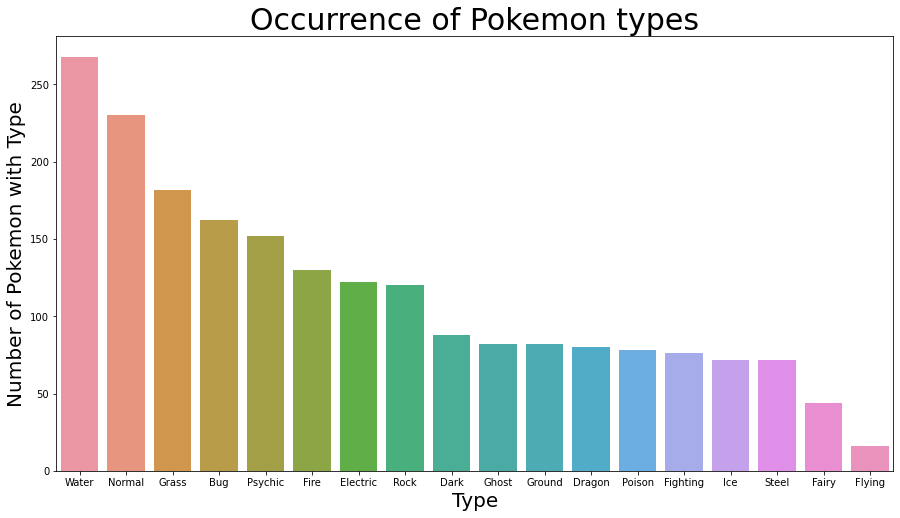

In [468]:
plt.figure(figsize=(15,8))
sns.barplot(x=type_count.index,y=type_count['count'])
plt.title("Occurrence of Pokemon types",fontdict={'fontsize':30})
plt.xlabel("Type",fontdict={'fontsize':20})
plt.ylabel('Number of Pokemon with Type',fontdict={'fontsize':20})

Water and Normal type of Pokemon is the most common and highly occured Pokemon in the dataset.

#### Question :

Number of pokemon in each type in each generation

In [469]:
generation_type=type_pokemon.groupby(['generation']).type_1.value_counts()
generation_type= pd.DataFrame({'count':generation_type})
generation_type


count
generation type_1       
1          Water      62
           Normal     50
           Poison     34
           Fire       30
           Bug        28
...                  ...
8          Bug         6
           Dragon      6
           Ghost       6
           Ground      6
           Poison      4

[134 rows x 1 columns]

#### Question :

How many times each combination occured

In [470]:
combos=pokemon.groupby(['type_1','type_2']).size().unstack()
for col in combos.columns:
    combos[col]=combos[col].fillna(0)
combos

type_2    Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
type_1                                                                        
Bug       0.0   0.0     0.0       4.0    2.0       4.0   2.0    33.0    1.0   
Dark      0.0   0.0     4.0       0.0    3.0       2.0   3.0    19.0    2.0   
Dragon    0.0   0.0     0.0       1.0    1.0       2.0   1.0    18.0    3.0   
Electric  0.0   2.0     2.0       0.0    2.0       0.0   1.0    39.0    1.0   
Fairy     0.0   0.0     0.0       0.0    0.0       0.0   0.0    21.0    0.0   
Fighting  0.0   1.0     0.0       0.0    0.0       0.0   0.0    29.0    1.0   
Fire      2.0   1.0     2.0       0.0    0.0       7.0   0.0    41.0    2.0   
Flying    0.0   0.0     2.0       0.0    0.0       0.0   0.0     4.0    0.0   
Ghost     0.0   1.0     2.0       0.0    1.0       0.0   3.0    17.0    0.0   
Grass     0.0   3.0     5.0       0.0    5.0       3.0   0.0    50.0    1.0   
Ground    0.0   3.0     2.0       1.0    0.0       0.0   1.0    21.0    4.0   
Ice       2.0   0.0     0.0       0.0    1.0       0.0   1.0    21.0    1.0   
Normal    0.0   0.0     1.0       0.0    5.0       4.0   0.0    98.0    0.0   
Poison    1.0   5.0     4.0       0.0    1.0       2.0   2.0    19.0    0.0   
Psychic   0.0   1.0     1.0       0.0    9.0       3.0   1.0    51.0    3.0   
Rock      2.0   2.0     2.0       3.0    3.0       1.0   2.0    22.0    0.0   
Steel     0.0   0.0     2.0       0.0    4.0       1.0   0.0    13.0    4.0   
Water     2.0   7.0     3.0       2.0    4.0       3.0   0.0    79.0    2.0   

type_2    Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
type_1                                                                     
Bug         6.0     2.0  0.0     0.0    12.0      2.0   3.0    7.0    3.0  
Dark        0.0     0.0  2.0     5.0     0.0      2.0   0.0    2.0    0.0  
Dragon      0.0     7.0  3.0     0.0     0.0      4.0   0.0    0.0    0.0  
Electric    1.0     0.0  2.0     2.0     3.0      1.0   0.0    4.0    1.0  
Fairy       0.0     0.0  0.0     0.0     0.0      0.0   0.0    1.0    0.0  
Fighting    0.0     0.0  1.0     0.0     0.0      3.0   0.0    3.0    0.0  
Fire        0.0     3.0  0.0     2.0     0.0      2.0   1.0    1.0    1.0  
Flying      0.0     0.0  0.0     0.0     0.0      0.0   0.0    1.0    1.0  
Ghost      11.0     2.0  0.0     0.0     4.0      0.0   0.0    0.0    0.0  
Grass       0.0     1.0  3.0     0.0    15.0      2.0   0.0    3.0    0.0  
Ground      0.0     0.0  0.0     0.0     0.0      2.0   3.0    4.0    0.0  
Ice         0.0     3.0  0.0     0.0     0.0      2.0   0.0    2.0    3.0  
Normal      2.0     1.0  0.0     0.0     0.0      3.0   0.0    0.0    1.0  
Poison      0.0     2.0  0.0     0.0     0.0      0.0   0.0    0.0    3.0  
Psychic     1.0     0.0  2.0     2.0     0.0      0.0   0.0    2.0    0.0  
Rock        2.0     6.0  2.0     0.0     1.0      2.0   0.0    4.0    6.0  
Steel       0.0     2.0  0.0     0.0     0.0      7.0   3.0    0.0    0.0  
Water       3.0    10.0  4.0     0.0     3.0      6.0   5.0    1.0    0.0

Text(159.0, 0.5, 'Type 2')

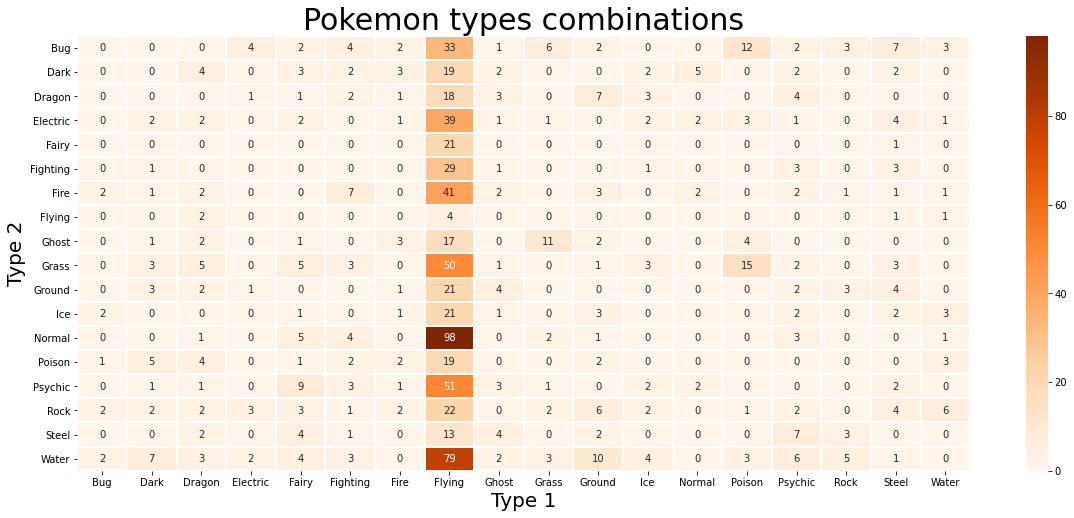

In [471]:
plt.figure(figsize=(20,8))
sns.heatmap(data=combos,annot=True,linewidths=1,cmap='Oranges')
plt.title("Pokemon types combinations",fontdict={'fontsize':30})
plt.xlabel("Type 1",fontdict={'fontsize':20})
plt.ylabel('Type 2',fontdict={'fontsize':20})

* In the combinations the Flying type of pokemon is highly paired with other type. Highest occuring pairs are [Flying + Normal] , [Flying + Water], [Flying+Psychic] etc.
* One more thing we can observe from the above heatmap that there is no combitions of Pokemon of same types.

#### Question :

what are diffrent types of species and ther count 

In [472]:
species_type=type_pokemon.groupby(['species']).type_1.value_counts()
species_type= pd.DataFrame({'count':species_type})
species_type


count
species            type_1         
Abundance Pokémon  Ground        4
Acorn Pokémon      Grass         2
Alloy Pokémon      Steel         2
Alpha Pokémon      Normal        2
Angler Pokémon     Water         2
...                            ...
Worm Pokémon       Ice           2
Wrestling Pokémon  Fighting      2
Young Fowl Pokémon Fire          2
Zen Charm Pokémon  Ice           6
                   Fire          2

[704 rows x 1 columns]

In [473]:
species_type=type_pokemon.groupby(['species']).type_2.value_counts()
species_type= pd.DataFrame({'count':species_type})
species_type

count
species            type_2         
Abundance Pokémon  Flying        4
Acorn Pokémon      Flying        2
Alloy Pokémon      Dragon        2
Alpha Pokémon      Flying        2
Angler Pokémon     Electric      2
...                            ...
Worm Pokémon       Bug           2
Wrestling Pokémon  Flying        2
Young Fowl Pokémon Fighting      2
Zen Charm Pokémon  Flying        6
                   Fire          2

[735 rows x 1 columns]

#### Question:

How many pokemons are of mythical type

In [474]:
pokemon['status'].value_counts()

Normal           915
Sub Legendary     45
Legendary         39
Mythical          29
Name: status, dtype: int64

There are 29 pokemon of mythical type.

#### Question :

How many mega type of pokemon are present in the dataset

In [475]:
substring='Mega'
mega_pokemon=pokemon[pokemon.name.str.contains(substring)]
print('Number of Mega pokemons are :',mega_pokemon.shape[0])

Number of Mega pokemons are : 49


#### Question:

Find out maximum and minimum of each feature

In [476]:
stat_category=['hp','attack','defense','sp_attack','sp_defense','speed','weight_kg']
pokemon[stat_category].describe().T

count       mean         std   min   25%    50%         75%  \
hp          1028.0  69.577821   26.385849   1.0  50.0  66.50   80.000000   
attack      1028.0  80.119650   32.372321   5.0  55.0  76.00  100.000000   
defense     1028.0  74.475681   31.303309   5.0  50.0  70.00   90.000000   
sp_attack   1028.0  72.732490   32.677698  10.0  50.0  65.00   95.000000   
sp_defense  1028.0  72.132296   28.083684  20.0  50.0  70.00   90.000000   
speed       1028.0  68.534047   29.802103   5.0  45.0  65.00   90.000000   
weight_kg   1028.0  69.753749  129.158303   0.1   8.8  28.65   69.815312   

              max  
hp          255.0  
attack      190.0  
defense     250.0  
sp_attack   194.0  
sp_defense  250.0  
speed       180.0  
weight_kg   999.9

In [477]:
for colm in stat_category:
    print("max",colm,':',pokemon.loc[pokemon[colm].idxmax()]['name'])
    print("min",colm,':',pokemon.loc[pokemon[colm].idxmax()]['name'])

max hp : Blissey
min hp : Blissey
max attack : Mega Mewtwo X
min attack : Mega Mewtwo X
max defense : Eternatus Eternamax
min defense : Eternatus Eternamax
max sp_attack : Mega Mewtwo Y
min sp_attack : Mega Mewtwo Y
max sp_defense : Eternatus Eternamax
min sp_defense : Eternatus Eternamax
max speed : Deoxys Speed Forme
min speed : Deoxys Speed Forme
max weight_kg : Cosmoem
min weight_kg : Cosmoem


#### Question :

Summary statistics by status

In [478]:
for each in stat_category:
    print('--------',each,'--------')
    print(pokemon.groupby('status')[each].mean())
    print('-------Total Points-------------')
    print(pokemon.groupby('status')['total_points'].mean())

-------- hp --------
status
Legendary        111.435897
Mythical          82.827586
Normal            66.504918
Sub Legendary     87.244444
Name: hp, dtype: float64
-------Total Points-------------
status
Legendary        679.564103
Mythical         594.482759
Normal           415.209836
Sub Legendary    581.422222
Name: total_points, dtype: float64
-------- attack --------
status
Legendary        125.743590
Mythical         108.172414
Normal            76.183607
Sub Legendary    102.533333
Name: attack, dtype: float64
-------Total Points-------------
status
Legendary        679.564103
Mythical         594.482759
Normal           415.209836
Sub Legendary    581.422222
Name: total_points, dtype: float64
-------- defense --------
status
Legendary        108.205128
Mythical          93.275862
Normal            71.343169
Sub Legendary     96.822222
Name: defense, dtype: float64
-------Total Points-------------
status
Legendary        679.564103
Mythical         594.482759
Normal           

Above are the mean of all status i.e Legendary, Mythical, Normal etc including features like hp, speed,total points etc. Its better to visualize above information.

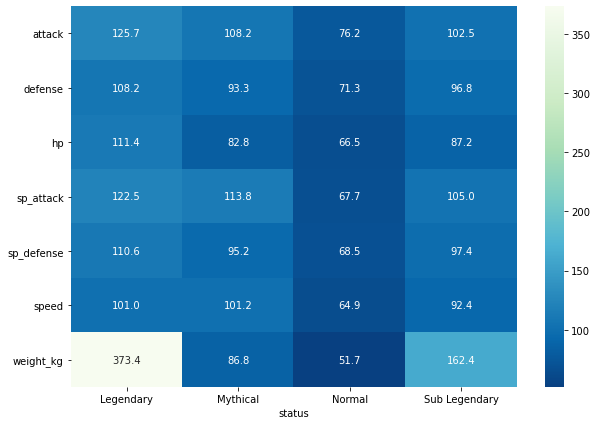

In [479]:
plt.figure(figsize=(10,7))
sns.heatmap(pd.pivot_table(pokemon,values=stat_category,columns='status'),annot=True,cmap='GnBu_r',fmt='.1f')

* The legendary type of Pokemon is Strongest as compaire to the others. from above heatmap we can see legendary Pokemon has highest - weight, speed, sp-defence, sp-attack, hp, defence and attach quality. 
* As compaire to other Normal type of Pokemons are weaker.

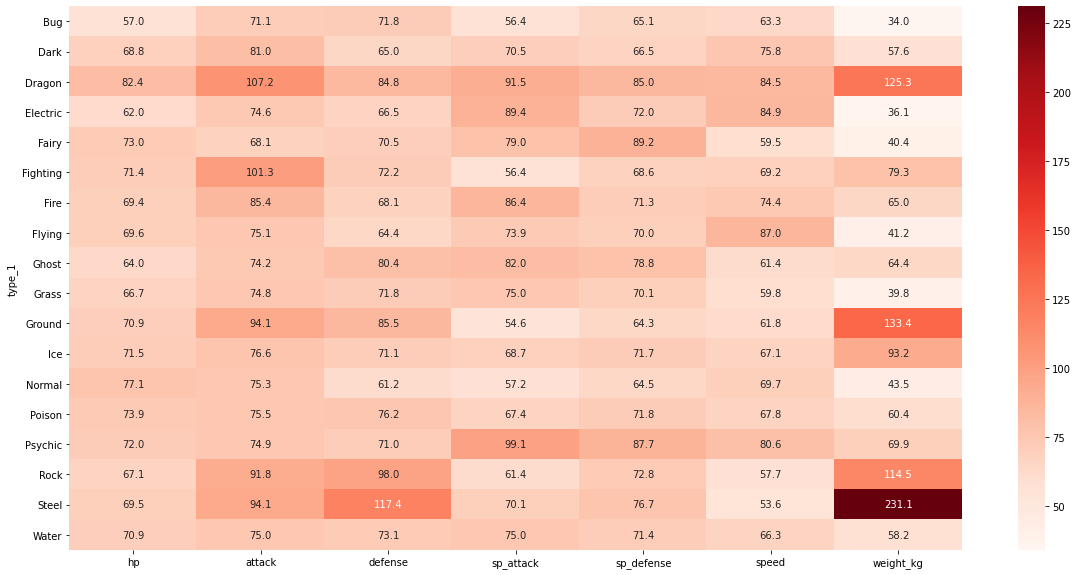

In [480]:
plt.figure(figsize=(20,10))
sns.heatmap(pokemon.groupby('type_1')[stat_category].mean(),annot=True,cmap='Reds',fmt='.1f')

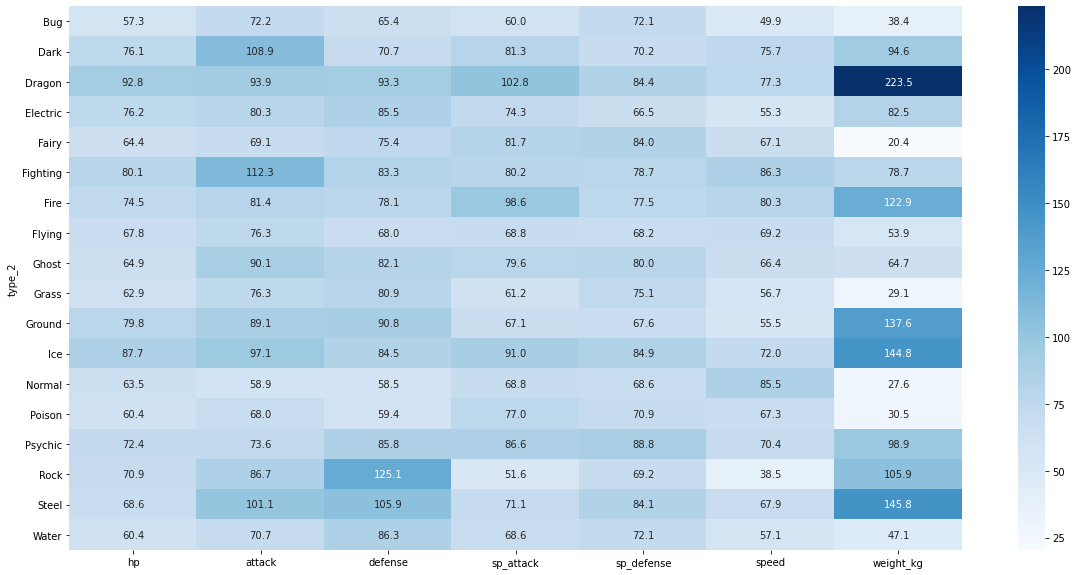

In [481]:
plt.figure(figsize=(20,10))
sns.heatmap(pokemon.groupby('type_2')[stat_category].mean(),annot=True,cmap='Blues',fmt='.1f')

#### Question:

What is the catch rate for diffrent status of pokemons

In [482]:
pokemon.groupby('status').catch_rate.describe().T

status   Legendary   Mythical      Normal  Sub Legendary
count    39.000000  29.000000  915.000000      45.000000
mean     30.975191  15.942902  102.233355      12.600000
std      49.768987  26.178620   69.443290      17.311846
min       3.000000   3.000000    3.000000       3.000000
25%       3.000000   3.000000   45.000000       3.000000
50%       3.000000   3.000000   75.000000       3.000000
75%      45.000000   3.000000  127.000000       3.000000
max     255.000000  93.172078  255.000000      45.000000

Text(0, 0.5, 'Meaan cathch rate')

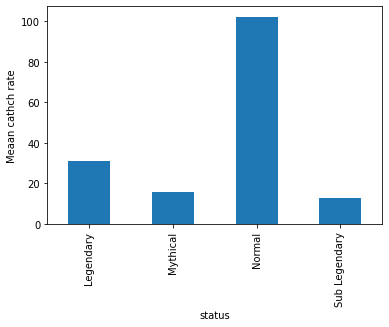

In [483]:
pokemon.groupby('status').catch_rate.mean().plot.bar()
plt.ylabel('Meaan cathch rate')

Mean catch rate of Normal type of pokemon is high. We can say it is easy to catch the Normal type of pokemon. 

####  Question:

What is the growth rate accorting to the type of pokemons

1. By generation

In [484]:
pokemon.groupby(['generation','growth_rate']).name.count()

generation  growth_rate
1           Fast             5
            Medium Fast    105
            Medium Slow     50
            Slow            32
2           Fast            19
            Medium Fast     41
            Medium Slow     25
            Slow            22
3           Erratic         17
            Fast            17
            Fluctuating     12
            Medium Fast     37
            Medium Slow     37
            Slow            45
4           Erratic          6
            Fast             8
            Fluctuating      2
            Medium Fast     43
            Medium Slow     30
            Slow            32
5           Fast             7
            Medium Fast     72
            Medium Slow     54
            Slow            38
6           Fast             1
            Medium Fast     53
            Medium Slow     15
            Slow            16
7           Fast             4
            Medium Fast     45
            Medium Slow     14
            Slo

2. By status

In [485]:
pokemon.groupby(['status','growth_rate']).name.count()

status         growth_rate
Legendary      Slow            39
Mythical       Medium Slow      4
               Slow            25
Normal         Erratic         26
               Fast            68
               Fluctuating     14
               Medium Fast    433
               Medium Slow    241
               Slow           133
Sub Legendary  Slow            45
Name: name, dtype: int64

#### Question :

Relationship between total points and other features

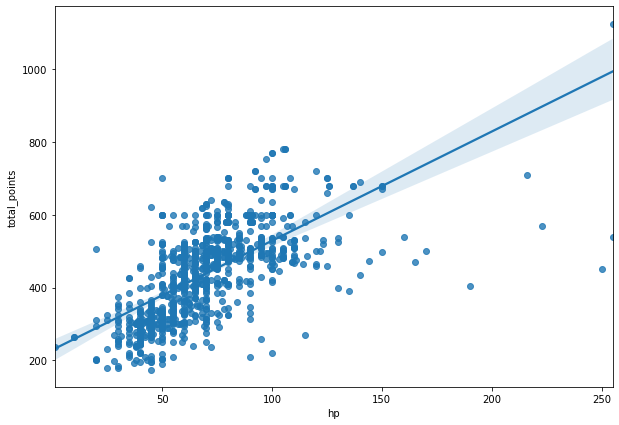

In [486]:
plt.figure(figsize=(10,7))
sns.regplot(y='total_points',x='hp',data=pokemon)

<Figure size 1440x720 with 0 Axes>

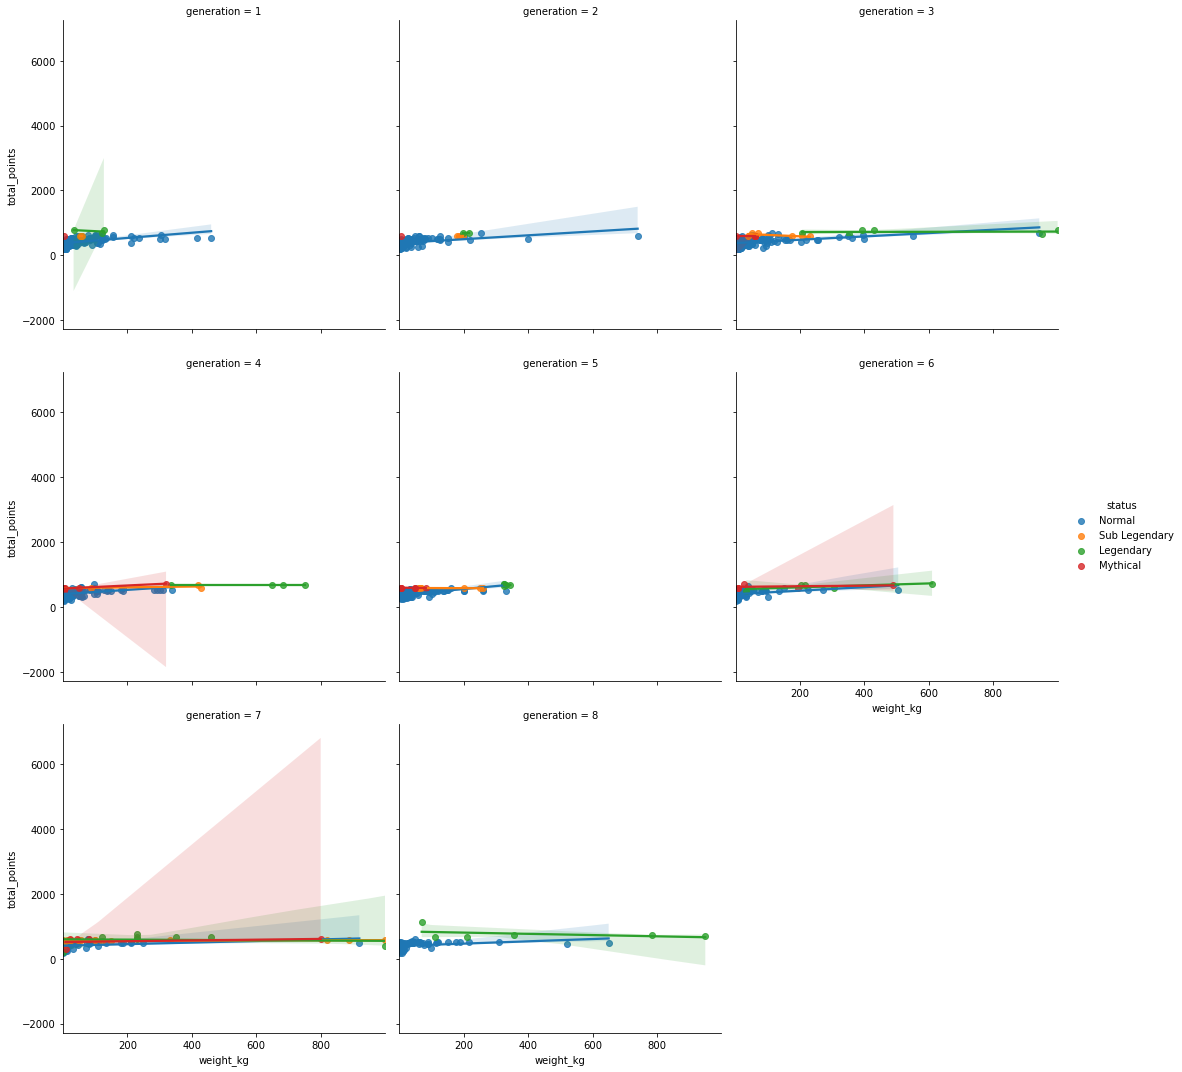

In [487]:
plt.figure(figsize=(20,10))
sns.lmplot(y='total_points',x='weight_kg',data=pokemon,hue='status',col='generation',col_wrap=3,height=5)

<Figure size 1440x720 with 0 Axes>

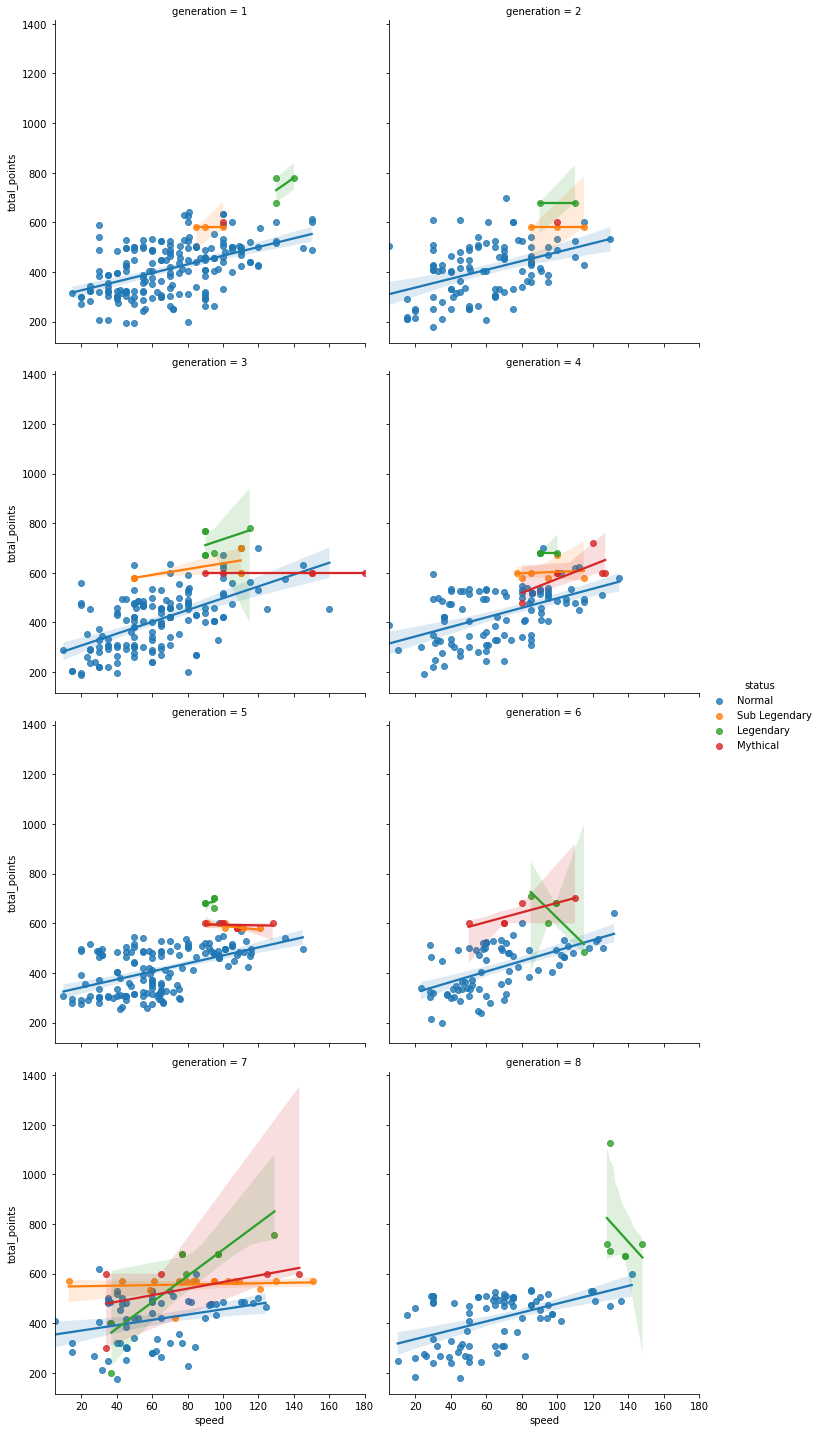

In [488]:
plt.figure(figsize=(20,10))
sns.lmplot(y='total_points',x='speed',data=pokemon,hue='status',col='generation',col_wrap=2,height=5)

#### Question :

Height of pokemons according to there types

In [489]:
pokemon.groupby(['type_1' ,'height_m']).name.count()

type_1  height_m
Bug     0.1          2
        0.2          2
        0.3         11
        0.4          6
        0.5         10
                    ..
Water   6.2          1
        6.5          2
        8.2          1
        9.8          1
        14.5         1
Name: name, Length: 376, dtype: int64

#### Question:

Types of pokemons with egg cycles

In [491]:
pokemon.groupby(['type_1','egg_cycles']).name.count()

type_1  egg_cycles
Bug     15.0          50
        20.0          19
        25.0           7
        40.0           2
        120.0          3
                      ..
Water   30.0           2
        35.0           3
        40.0           8
        80.0           3
        120.0          3
Name: name, Length: 103, dtype: int64

In [492]:
pokemon.groupby(['status','egg_cycles']).name.count()

status         egg_cycles
Legendary      120.000000     39
Mythical       10.000000       1
               25.000000       2
               40.000000       1
               80.000000       2
               120.000000     23
Normal         5.000000        3
               10.000000      24
               15.000000     165
               20.000000     543
               25.000000      81
               30.000000      27
               30.316456       1
               35.000000      20
               40.000000      51
Sub Legendary  10.000000       1
               15.000000       4
               80.000000      15
               120.000000     25
Name: name, dtype: int64

Legendary and Sub-legendary type of pokemons has the more egg_cycles to evolve the pokemon.

#### Question :

Tallest pokemon and shoetest pokemon according to height.

In [495]:
pokemon.sort_values(by='height_m', ascending=True)[:1]

name  generation  status          species  type_number type_1 type_2  \
864  Cutiefly           7  Normal  Bee Fly Pokémon            2    Bug  Fairy   

     height_m  weight_kg  abilities_number  ... speed catch_rate  \
864       0.1        0.2                 3  ...  84.0      190.0   

     base_friendship  base_experience  growth_rate  egg_type_number  \
864             70.0             61.0  Medium Fast                2   

     egg_type_1  percentage_male  egg_cycles   rank  
864         Bug             50.0        20.0  862.0  

[1 rows x 28 columns]

In [497]:
pokemon.sort_values(by='height_m', ascending=False)[:1]

name  generation     status           species  \
1027  Eternatus Eternamax           8  Legendary  Gigantic Pokémon   

      type_number  type_1  type_2  height_m  weight_kg  abilities_number  ...  \
1027            2  Poison  Dragon     100.0  69.753749                 0  ...   

      speed catch_rate  base_friendship  base_experience  growth_rate  \
1027  130.0  93.172078         64.13961         64.13961         Slow   

      egg_type_number    egg_type_1  percentage_male  egg_cycles  rank  
1027                1  Undiscovered        55.003157       120.0   1.0  

[1 rows x 28 columns]

The tallest pokemon is Eternatus Eternamax and smallest is Cutiefly

## conclusion

* There are 8 generation of Pokemon among which generation 2 Pokemon is strongest.
* Mythical type of Pokemons are rare to find.
* Features impactig the total_points positively are base_experience, sp-attack, sp-defense, Attack.
* Feature impacting the total_points negatively are catch_rate, Base-Friendship.
* Strongest combination of pokemon is poision+Dragon
* Legendary type of Pokemons are  strongest as compare to other types.
* Legendary and Sub-legendary type of Pokemons has highest egg cycles.

### Final word:

If we want to choose the strongest pokemon who has highest winning possibilities, strongest in all categories the "Eternatus Eternamax" is the best choice.